## Problem Statement:

* This project understands how the price or value of a automobile is affected by variables such as Mileage, Year, or Make/Model. The goal is to train a model to recommend only cars that are deamed best to purchase based on the asking price and predicted resell price or value of the car.

## Data Collection:

* As of now, the Data is gathered from the Craigslist Website for used automobiles being sold only by private dealers from specific locations in Texas, such as Dallas, Houston, and Austin.
* The created Database ('Sqlite.db'), consists of 3 tables being the FullDataset, AttributesTable, and the DescriptionsTable.
* For this EDA file, we will be focusing on analyzing the AttributesTable that consists of everything from the Fulldataset except the Description column. The reason for this is so that I can later use the DescriptionTable to perform NLP analysis.

### Import Data and Required Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import Data as Pandas DataFrame:

In [2]:
import sqlite3

with sqlite3.connect(r'C:\Users\goodn\Documents\code\notebook\data\Sqlite.db') as conn:
    query = "SELECT * FROM AttributesTable"   
    df = pd.read_sql(query, conn)
print(df.head())

      Post ID condition: fuel:  odometer:        type: paint color:  \
0  7826021982       good   gas   183090.0          SUV        black   
1  7826018945  excellent   gas    71279.0       pickup        white   
2  7826018781  excellent   gas   154000.0          SUV        white   
3  7826018042       good   gas   140000.0  convertible         blue   
4  7826016532       good   gas   107000.0        sedan        white   

  title status:               VIN: transmission:  Year    Price  \
0         clean               None     automatic  2006   1500.0   
1          lien  1FTFW1E8XNFB23421     automatic  2022  55900.0   
2         clean               None     automatic  2016   6999.0   
3         clean               None        manual  2001  22900.0   
4         clean               None     automatic  2013   8500.0   

                                Model   cylinders: drive:  
0              Toyota RAV4 Standard\n  6 cylinders    fwd  
1              Ford F-150 SuperCrew\n  6 cylinders

In [3]:
print([repr(col) for col in df.columns])

["'Post ID'", "'condition:'", "'fuel:'", "'odometer:'", "'type:'", "'paint color:'", "'title status:'", "'VIN:'", "'transmission:'", "'Year'", "'Price'", "'Model'", "'cylinders:'", "'drive:'"]


* The values of the model feature end with '\n', I will have to remove this and clean it very soon.

### MetaData:

In [4]:
df.shape

(6225, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Post ID        6225 non-null   int64  
 1   condition:     5201 non-null   object 
 2   fuel:          6225 non-null   object 
 3   odometer:      6219 non-null   float64
 4   type:          5538 non-null   object 
 5   paint color:   4614 non-null   object 
 6   title status:  6225 non-null   object 
 7   VIN:           1072 non-null   object 
 8   transmission:  6225 non-null   object 
 9   Year           6225 non-null   int64  
 10  Price          6221 non-null   float64
 11  Model          6225 non-null   object 
 12  cylinders:     4846 non-null   object 
 13  drive:         4035 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 681.0+ KB


* Notice there are 4 numerical features and 10 features with the object dtype
* Also the post_id should instead have the dtype as object instead of int64

---

## Minor Adjustments to the Data:

In [6]:
#Minor adjustments to the header names
df = df.rename(columns={
    'Post ID':'post_id',
    'paint color:':'paint_color',
    'title status:':'title_status'
})
df.columns = df.columns.str.rstrip(':')
# print(df.columns)

In [7]:
print(df.columns)

Index(['post_id', 'condition', 'fuel', 'odometer', 'type', 'paint_color',
       'title_status', 'VIN', 'transmission', 'Year', 'Price', 'Model',
       'cylinders', 'drive'],
      dtype='object')


In [8]:
#Convert the Dtpye of the post_id feature to str
df['post_id'] = df['post_id'].astype(str)

In [9]:
df['Model'] = df['Model'].str.strip()
df['Model'].head()

0               Toyota RAV4 Standard
1               Ford F-150 SuperCrew
2                jeep cherokee sport
3    honda s2000 convertible 6 speed
4                       chrysler 300
Name: Model, dtype: object

### Observation:

* I decided to make some minor adjustments to the column headers for better readibility and consistent header format.
* I changed the dtype for post_id to str instead of int64, because the feauture is more like a label or identifier.
* I also stripped the values for the 'Model' feature, handling any leading/trailing whitespace.

---

## Duplicates:

In [10]:
duplicates = df.duplicated().sum()
print(f"There are {duplicates} duplicates found in the table.")

There are 543 duplicates found in the table.


In [11]:
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicates have been removed.")

Duplicates have been removed.


In [12]:
duplicates = df.duplicated().sum()
print(f"There are {duplicates} duplicates found in the table.")

There are 0 duplicates found in the table.


In [13]:
df.shape

(5682, 14)

### Observation:

* 543 duplicates were found and removed from the DataFrame.
* Making the DataFrame go from having 6225 instances to 5682 instances.

---

## Missing Values:

In [14]:
df.isna().sum()

post_id            0
condition        934
fuel               0
odometer           6
type             632
paint_color     1481
title_status       0
VIN             4670
transmission       0
Year               0
Price              4
Model              0
cylinders       1249
drive           1983
dtype: int64

In [15]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), "% missing values")

condition 0.1644 % missing values
odometer 0.0011 % missing values
type 0.1112 % missing values
paint_color 0.2606 % missing values
VIN 0.8219 % missing values
Price 0.0007 % missing values
cylinders 0.2198 % missing values
drive 0.349 % missing values


<Axes: >

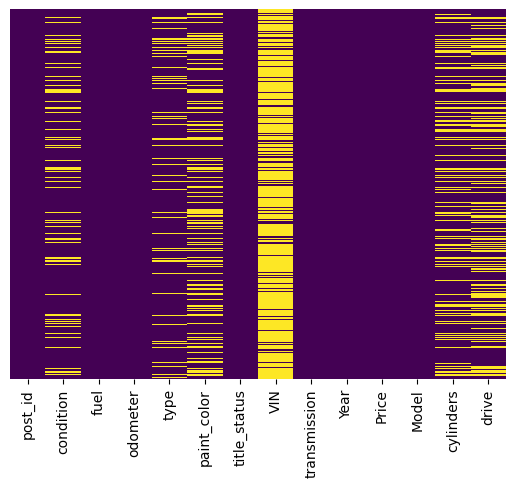

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* Note there are many missing values in the table or dataset.

### Categorical Features with missing values:

In [17]:
#Categorical features with missing values
categorical_features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes == 'O']
for feature in categorical_features_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), "% missing values")

condition 0.1644 % missing values
type 0.1112 % missing values
paint_color 0.2606 % missing values
VIN 0.8219 % missing values
cylinders 0.2198 % missing values
drive 0.349 % missing values


In [18]:
def replace_cat_features(df,categorical_features_nan):
    df_copy = df.copy()
    df_copy[categorical_features_nan] = df_copy[categorical_features_nan].fillna('Missing')
    return df_copy
df_copy = df.copy()
df_copy = replace_cat_features(df_copy,categorical_features_nan)
print(df_copy[categorical_features_nan].isnull().sum())

condition      0
type           0
paint_color    0
VIN            0
cylinders      0
drive          0
dtype: int64


* I handled the missing values for the categorical features by filling them in with the value 'Missing'.
* I think it would be important to keep in mind of the proportion of the missing values for each category, especially for the 'VIN' feature.

### Numerical Features with missing values:

In [19]:
numerical_features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype != 'O']

for feature in numerical_features_nan:
    print(feature, np.round(df_copy[feature].isnull().mean(), 4), "% missing values")

odometer 0.0011 % missing values
Price 0.0007 % missing values


In [20]:
for feature in numerical_features_nan:
    median_val = df_copy[feature].median()
    df_copy[feature+'nan'] = np.where(df_copy[feature].isnull(),1,0)
    df_copy[feature] = df_copy[feature].fillna(median_val)
print(df_copy[numerical_features_nan].isnull().sum())

odometer    0
Price       0
dtype: int64


* Because the proportion of the missing values for the numerical features were so low, I decided that it would be best to keep it simple and handle the missing values with just their median.

In [21]:
df_copy.isna().sum()

post_id         0
condition       0
fuel            0
odometer        0
type            0
paint_color     0
title_status    0
VIN             0
transmission    0
Year            0
Price           0
Model           0
cylinders       0
drive           0
odometernan     0
Pricenan        0
dtype: int64

### Observation:

* Because there are many missing values, later on we will need to evaluate the relationship between the missing values and the dependent variable. To evaluate how they will be handled later on during our feature engineering.
* It seems that the 'VIN' feature has a large proportion of its data to be missing, so much that the feature might not be very useful. The feature will most likely be dropped, or atleast be converted to a dummy variable since it is a categorical feature.

---

## Exploring the Features:

In [22]:
df.nunique()

post_id         5657
condition          6
fuel               5
odometer        2271
type              13
paint_color       12
title_status       6
VIN              938
transmission       3
Year              93
Price            811
Model           2699
cylinders          8
drive              3
dtype: int64

* I would like to take note the the table has 5682 instances and each instance should have a unique post_id. Though weirdly enough, the post_id feature has 5657 unique values. As of now I am not able to explain the cause or reason, but I dont believe this will interfere with the analysis or model.

In [23]:
df.describe()

,odometer,Year,Price
count,5.676000e+03,5682.000000,5678.000000
mean,1.419653e+05,2007.717881,12676.904544
std,2.811492e+05,13.525522,15284.302400
min,1.000000e+00,1923.000000,0.000000
25%,8.147500e+04,2005.000000,4950.000000
50%,1.284750e+05,2011.000000,8499.000000
75%,1.730000e+05,2015.000000,14750.000000
max,9.999999e+06,2026.000000,359000.000000


### Observation:

* It looks like the odometer feature may contain some unusual values, since the minimum and maximum values are 1 and 10 million. This is an issue that I will have to handle during my feature engineering, as of now I will have to wait in analyzing the odometer feature. It's most likely due to the feature having these extreme values or incorrect values that is causing this.

In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] #np.issubdtype(df[feature].dtype, np.number)]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("There are {} numerical features {}".format(len(numeric_features),numeric_features))
print("\nThere are {} categorical features {}".format(len(categorical_features),categorical_features))

There are 3 numerical features ['odometer', 'Year', 'Price']

There are 11 categorical features ['post_id', 'condition', 'fuel', 'type', 'paint_color', 'title_status', 'VIN', 'transmission', 'Model', 'cylinders', 'drive']


* For the 'Year' feature I might want to consider creating a new feature representing the "Age" of the vehicle. By subtracting the 'Year' from the currect year, in order to understand how old the vehicle is.
* Thankfully, there are only 3 numeric features, so it will be rather easy to determine which are discrete or continuous just by understanding the feature itself. And so we can assess that of the numeric features, the 'Year' feature is the only discrete numeric feature we have, making 'odometer' and 'Price' continuous.

In [25]:
categorical_features = ['condition','fuel','type','paint_color','title_status','transmission','cylinders','drive'] #Not including VIN and model features
for feature in df_copy[categorical_features]:
    print(f"\nCategories in {feature} variable:",df_copy[feature].unique())


Categories in condition variable: ['good' 'excellent' 'Missing' 'like new' 'salvage' 'fair' 'new']

Categories in fuel variable: ['gas' 'diesel' 'hybrid' 'other' 'electric']

Categories in type variable: ['SUV' 'pickup' 'convertible' 'sedan' 'truck' 'coupe' 'hatchback'
 'Missing' 'minivan' 'van' 'wagon' 'other' 'bus' 'offroad']

Categories in paint_color variable: ['black' 'white' 'blue' 'grey' 'silver' 'Missing' 'custom' 'red' 'orange'
 'brown' 'green' 'purple' 'yellow']

Categories in title_status variable: ['clean' 'lien' 'salvage' 'rebuilt' 'missing' 'parts only']

Categories in transmission variable: ['automatic' 'manual' 'other']

Categories in cylinders variable: ['6 cylinders' '4 cylinders' 'Missing' '8 cylinders' '10 cylinders'
 '5 cylinders' '3 cylinders' 'other' '12 cylinders']

Categories in drive variable: ['fwd' '4wd' 'rwd' 'Missing']


* Notice the the features with missing values, are handled with 'None' as the missing value type.
* I see that some of the categorical features such as 'transmission' has a 'other' unique value. I will consider analyzing how frequent this value occurs.
* I excluded the 'post_id', 'VIN', and 'model' features, because as expected the features have too many unique values to observe.
* Thankfully, there aren't any typos or incorrect values for this list of categorical features.

In [26]:
invalid_vins = df[df['VIN'].str.len() < 17]
print(f"Number of rows with invalid VINs: {len(invalid_vins)}")

Number of rows with invalid VINs: 26


* I noticed that there were some unique values for the VIN feature that seemed to be incorrect or non legitimate VIN numbers. Because a standard VIN number always concists of 17 characters.
* There could be some explanation for this that can indicate a few things to consider. It may be a simple typo with no meaning or it could be a older vehicle since vehicles made before 1981 can have a VIN with 5-13 characters.
* I think it would be a great idea to convert the 'VIN' feature into a dummy variable, and see if it may have an affect on price.
* It's also worth mentioning that out of all of the features the VIN feature has the highest missing values, approximately 0.8219%.

In [27]:
invalid_vins_yr = invalid_vins[invalid_vins['Year'] < 1981]
print(f"Number of invalid VINs with year before 1981: {len(invalid_vins_yr)}")

Number of invalid VINs with year before 1981: 26


* It might be a coincidence, but all of the non legitimate VIN numbers, were all made before 1981, which supports my theory before. But it is still liekly that they may be typos.

In [28]:
print(df['Model'].head())

0               Toyota RAV4 Standard
1               Ford F-150 SuperCrew
2                jeep cherokee sport
3    honda s2000 convertible 6 speed
4                       chrysler 300
Name: Model, dtype: object


* Some of the instances for the 'Model' feature have included the make and model of the vehicle, I might want to create a feature to sepearte the make of the vehicle from its model name.

### Considerations:
* Create a feature to sepearte the make of the vehicle from its model name.
* Convert the 'VIN' feature into a dummy variable, and see if it may have an affect on price.
* Consider analyzing the frequency of values such as 'other'.
* Consider creating a new feature representing the "Age" of the vehicle.

---

# Outlier Screening:

In [29]:
numeric_features = [feature for feature in df.columns if np.issubdtype(df[feature].dtype, np.number)]
print("There are {} numerical features {}".format(len(numeric_features),numeric_features))

There are 3 numerical features ['odometer', 'Year', 'Price']


* Only 'Year' is a Discrete Variable, 'Price' and 'odometer' are continuous variables.

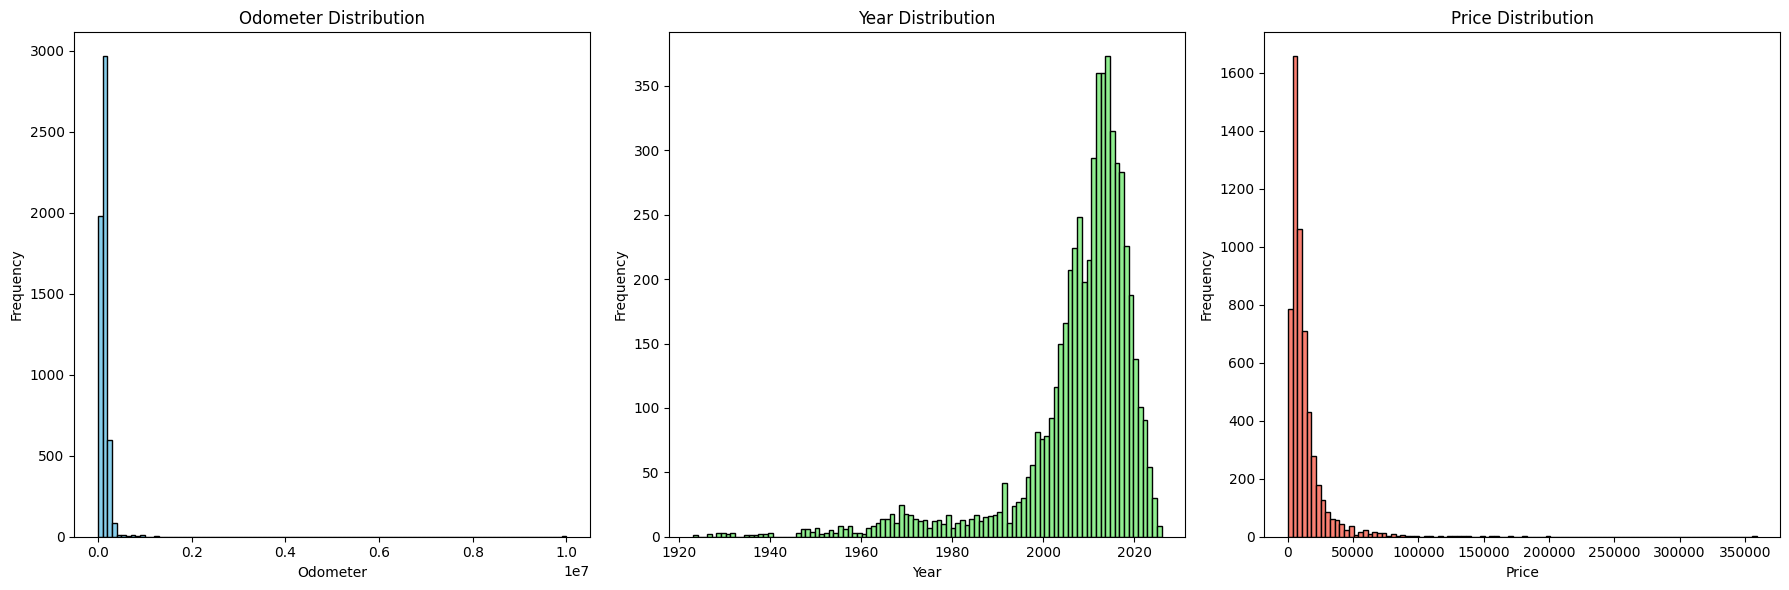

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(df_copy['odometer'], bins=100, color='skyblue', edgecolor='black')
axes[0].set_title('Odometer Distribution')
axes[0].set_xlabel('Odometer')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_copy['Year'], bins=100, color='lightgreen', edgecolor='black')
axes[1].set_title('Year Distribution')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')

axes[2].hist(df_copy['Price'], bins=100, color='salmon', edgecolor='black')
axes[2].set_title('Price Distribution')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

* The majority of the vehicles are newer models and there are fewer older models.

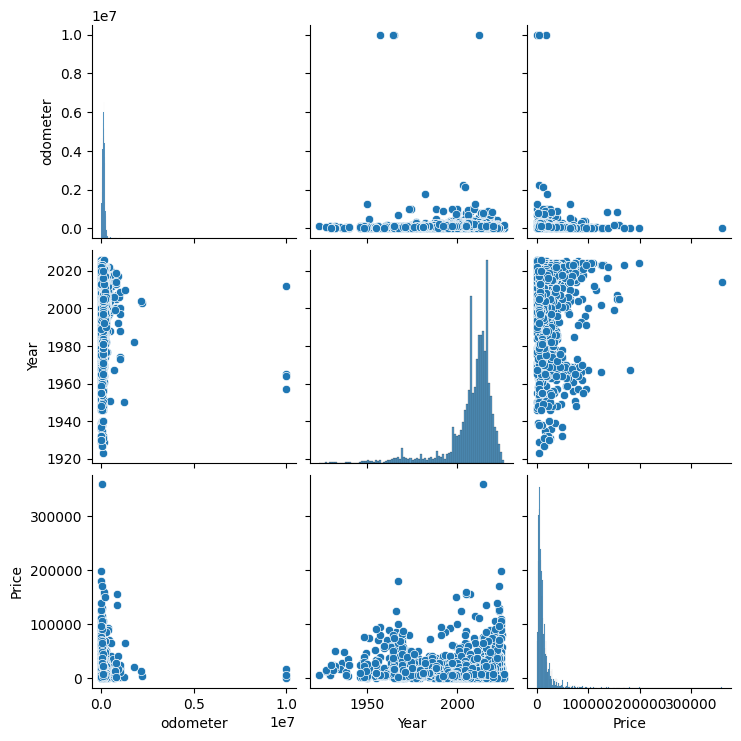

In [31]:
sns.pairplot(df_copy[numeric_features])

* Looking at the two visualization plots above and referring to the summary statistics displayed earlier. I noticed there being outliers present in the 'Model' and 'Price' features. Making it diffuclt to visualize the features relationships, I will need to analyze the outliers.

---

# **Exploring Outliers Per Feature(Univariate Analysis):**

## Exploring the Odometer Feature for Outliers:

<Axes: xlabel='odometer'>

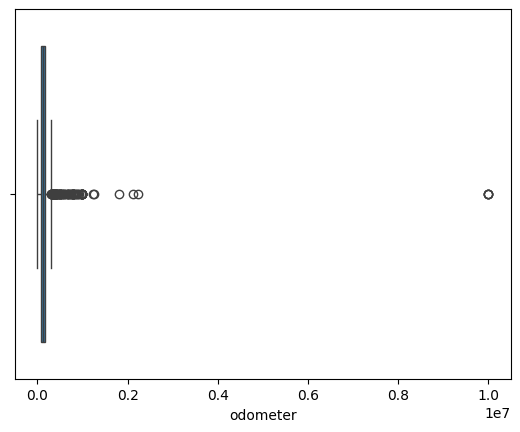

In [32]:
sns.boxplot(x=df_copy['odometer'])

Text(0, 0.5, 'Frequency')

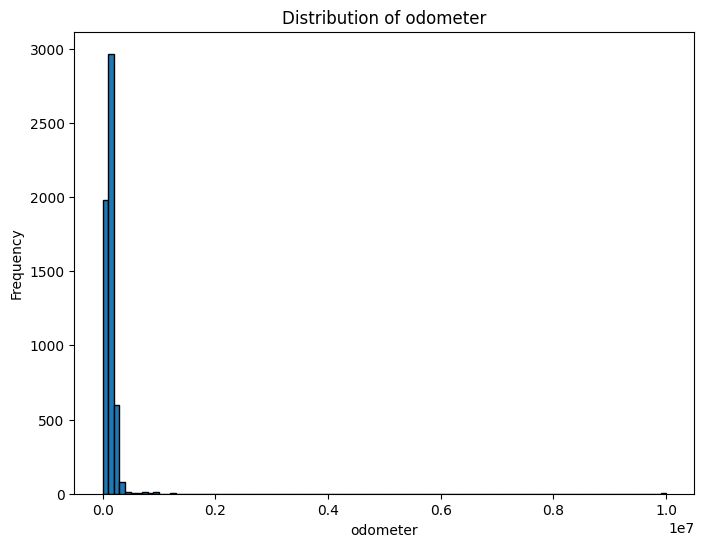

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(df_copy['odometer'], bins=100, edgecolor='black')
plt.title('Distribution of odometer')
plt.xlabel('odometer')
plt.ylabel('Frequency')

* Earlier we noticed there being potential outliers for the odometer feature when inspecting the statistical decription and pairplot for our numerical features.
* These visualizations or plots help with us understand the proportion of outliers in the odometer feature. The distribution is extremely skewed and so it would be best to use the IQR method instead of the Z score method, to better detect the outliers.


### IQR Method:

In [34]:
odometer = df_copy['odometer']
sorted(odometer)
Q1, Q3 = np.percentile(odometer,[25,75])
print(Q1,Q3)

81585.0 173000.0


In [35]:
iqr = Q3-Q1
print(iqr)

91415.0


In [36]:
lower_bound = Q1-(1.5 * iqr)
upper_bound = Q3+(1.5 * iqr)
print(lower_bound,upper_bound)

-55537.5 310122.5


In [37]:
odom_outliers = df_copy[(df_copy['odometer'] < lower_bound) | (df_copy['odometer'] > upper_bound)]
print(odom_outliers)


         post_id  condition    fuel   odometer     type paint_color  \
67    7825910955   like new     gas   332000.0   pickup       white   
209   7825560234       fair     gas  9999999.0    coupe       white   
232   7825513099       good     gas  2220345.0   pickup       white   
248   7825445448       good  diesel   350000.0   pickup         red   
254   7825421434       fair     gas   999999.0    truck       white   
...          ...        ...     ...        ...      ...         ...   
5413  7819469769  excellent     gas   327000.0   pickup      silver   
5474  7819237866       good  diesel   750000.0  Missing     Missing   
5502  7819119318  excellent  diesel   826884.0    truck     Missing   
5526  7819038783       fair  diesel   741375.0    truck      purple   
5616  7818525564    Missing     gas   789567.0  Missing     Missing   

     title_status                VIN transmission  Year    Price  \
67          clean            Missing    automatic  2000   5950.0   
209        

* I noticed the Upper bound and lower bound values not being reasonable in the case for the odometer of vehicles. This could be because the distribution of the feature is extremely skewed, especially because some of the extreme outliers are around 10 million. A solution to this would be to apply a log transformation to the feauture in order to "squeeze" the distribution.

### Applying the Log Transformation to the odometer feature:

In [38]:
df_copy['log_odometer'] = np.log1p(df_copy['odometer'])
df_copy['log_odometer']

0       12.117739
1       11.174371
2       11.944714
3       11.849405
4       11.580593
          ...    
5677     7.163172
5678    11.775297
5679    11.686887
5680    11.594791
5681    11.740865
Name: log_odometer, Length: 5682, dtype: float64

In [39]:
log_odometer = df_copy['log_odometer']
sorted(log_odometer)
Q1, Q3 = np.percentile(log_odometer,[25,75])
print(Q1,Q3)

11.309412816818131 12.06105265381003


In [40]:
iqr = Q3-Q1
print(iqr)

0.7516398369918988


In [41]:
lower_bound = Q1-(1.5 * iqr)
upper_bound = Q3+(1.5 * iqr)
print(lower_bound,upper_bound)

10.181953061330283 13.188512409297878


In [42]:
odometer_outliers = df_copy[(df_copy['log_odometer'] < lower_bound) | (df_copy['log_odometer'] > upper_bound)]
print(odometer_outliers)


         post_id  condition    fuel  odometer       type paint_color  \
9     7826012645  excellent     gas   26000.0      sedan       white   
14    7826006175  excellent     gas    1600.0     pickup      custom   
21    7825990439  excellent     gas   22600.0  hatchback         red   
25    7825980475  excellent     gas   15395.0      truck      silver   
26    7825979501    Missing     gas       1.0    Missing     Missing   
...          ...        ...     ...       ...        ...         ...   
5616  7818525564    Missing     gas  789567.0    Missing     Missing   
5632  7818365830    Missing     gas    1000.0    Missing     Missing   
5658  7818278747  excellent     gas     109.0      sedan       white   
5676  7818184051  excellent   other   15500.0  hatchback       black   
5677  7818179438  excellent  diesel    1290.0      truck       white   

     title_status                VIN transmission  Year    Price  \
9           clean            Missing    automatic  2022  17000.0   

* Notice that the instances with extreme outliers may have a relationship with year and price. Some of the instances even have many missing values, this is important to keep in mind for later on when deciding how to handle the outliers.
* The log transformation seemed to have helped with detecting the outliers closer to zero, as before the lower bound was negative which wasn't helpful in detecting the outliers that were extremely low. An example of an instance of odometer having a value of 1, which is very unlikely and extreme for the odometer of a vehicle, especially if the vehicle was made long ago.
* Before applying the log transformation, the IQR method detected 149 instances to have outliers, but after applying the log transformation it was detected to have 489 instances with outliers.

Text(0.5, 1.0, 'Boxplot of Log-Transformed Odometer')

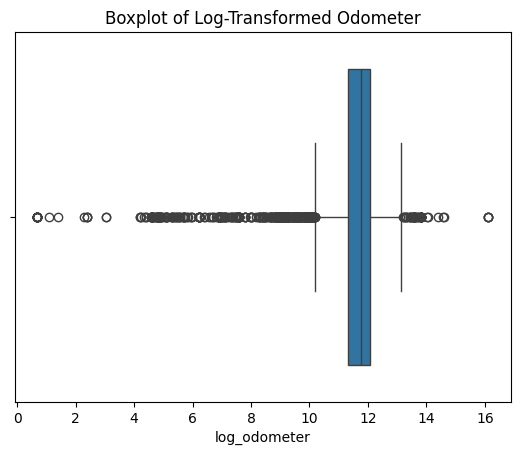

In [43]:
sns.boxplot(x=df_copy['log_odometer'])
plt.title('Boxplot of Log-Transformed Odometer')

Text(0, 0.5, 'Frequency')

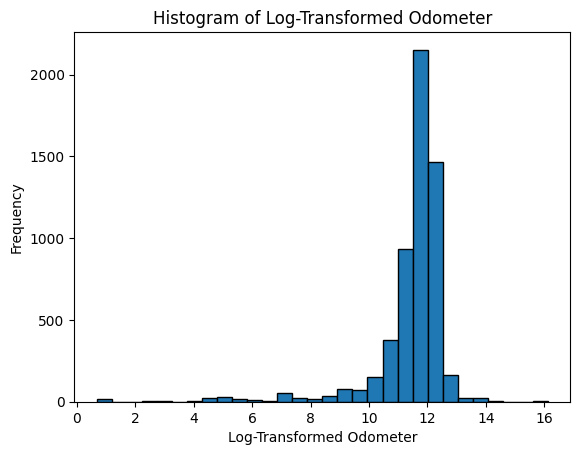

In [44]:
plt.hist(df_copy['log_odometer'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Odometer')
plt.xlabel('Log-Transformed Odometer')
plt.ylabel('Frequency')

* The distribution and boxplot seem to have normalized significantly compared to before applying the log transformation.

### Z Score Method for the Odometer Feature:

In [45]:
from scipy import stats
od_z_scores = np.abs(stats.zscore(df_copy['log_odometer']))
odometer_outliers = df_copy[od_z_scores>1.5]
print(f"found {len(odometer_outliers)} outliers")
print(odometer_outliers)

found 335 outliers
         post_id  condition    fuel  odometer       type paint_color  \
14    7826006175  excellent     gas    1600.0     pickup      custom   
26    7825979501    Missing     gas       1.0    Missing     Missing   
38    7825956664       good  diesel    1000.0    Missing     Missing   
39    7825950219    Missing     gas     138.0    Missing     Missing   
80    7825885108    Missing     gas    8120.0    Missing      silver   
...          ...        ...     ...       ...        ...         ...   
5601  7818627202    salvage     gas       1.0  hatchback      silver   
5616  7818525564    Missing     gas  789567.0    Missing     Missing   
5632  7818365830    Missing     gas    1000.0    Missing     Missing   
5658  7818278747  excellent     gas     109.0      sedan       white   
5677  7818179438  excellent  diesel    1290.0      truck       white   

     title_status      VIN transmission  Year    Price              Model  \
14          clean  Missing    automatic

In [46]:
copy = df_copy.copy()
copy.shape

(5682, 17)

In [47]:
od_outlier_indices = copy[od_z_scores > 1.5].index
copy = copy.drop(od_outlier_indices)
print(f"Removed {len(od_outlier_indices)} outliers")

Removed 335 outliers


In [48]:
copy.shape

(5347, 17)

Text(0.5, 1.0, 'After Outlier Removal')

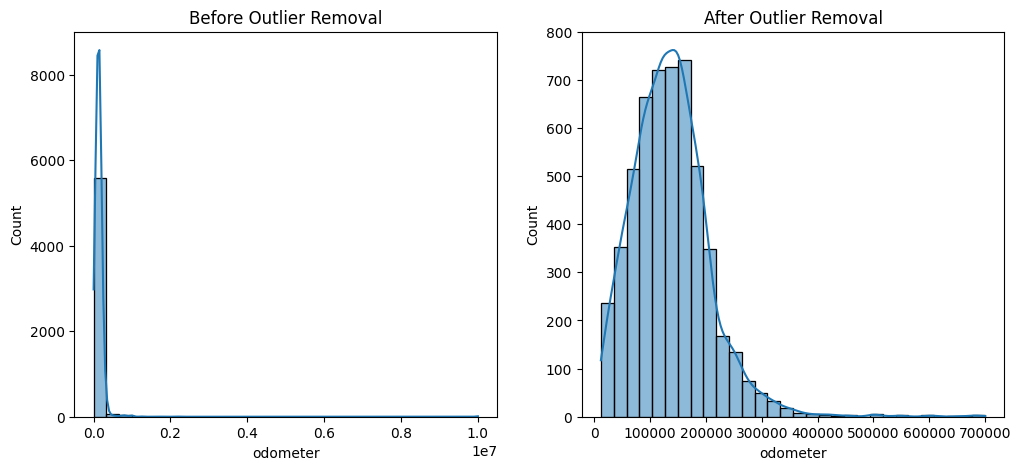

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_copy['odometer'], bins=30, ax=axes[0], kde=True).set_title("Before Outlier Removal")
sns.histplot(copy['odometer'], bins=30, ax=axes[1], kde=True).set_title("After Outlier Removal")

Text(0.5, 1.0, 'After Outlier Removal')

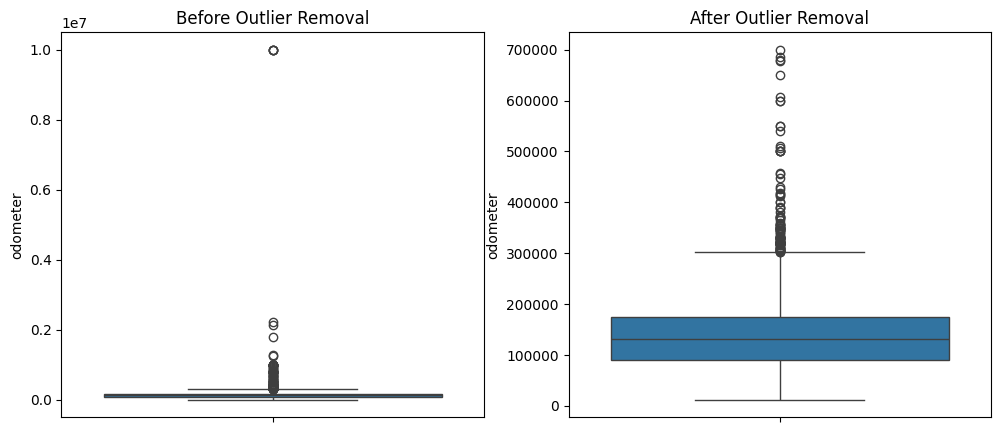

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(df_copy['odometer'], ax=axes[0]).set_title("Before Outlier Removal")
sns.boxplot(copy['odometer'], ax=axes[1]).set_title("After Outlier Removal")


In [51]:
copy['odometer'].describe()

count      5347.000000
mean     137274.422293
std       69696.668484
min       12008.000000
25%       90000.000000
50%      132112.000000
75%      175000.000000
max      700000.000000
Name: odometer, dtype: float64

## **Exploring the Price Feature for Outliers:**

<Axes: xlabel='Price'>

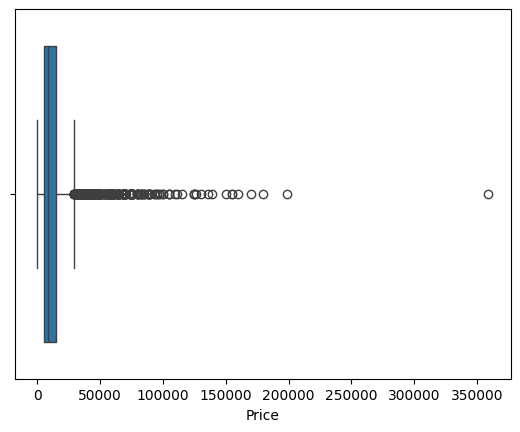

In [52]:
sns.boxplot(x=df_copy['Price'])

Text(0, 0.5, 'Frequency')

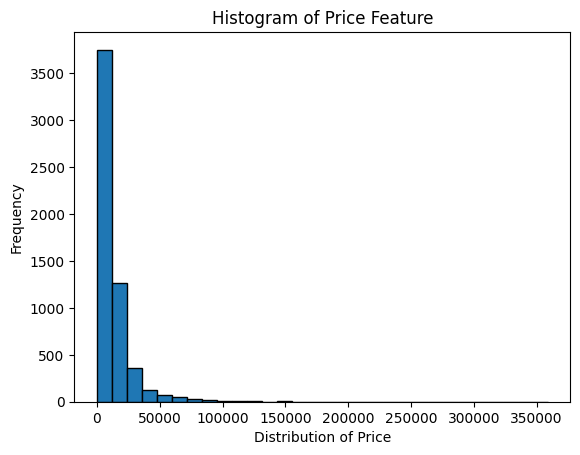

In [53]:
plt.hist(df_copy['Price'], bins=30, edgecolor='black')
plt.title('Histogram of Price Feature')
plt.xlabel('Distribution of Price')
plt.ylabel('Frequency')

* The Price feature seems to be the same case for the odometer feature. As in the distribution or spread is extrememly skewed, most likely due to extreme outliers like for instance I believe the max price or value is about 350,000.
* I think there might be a relationship with price and odometer that could be used to detect and distinguish Erroneous Outliers from Legitimate Outliers.

(0.0, 50000.0)

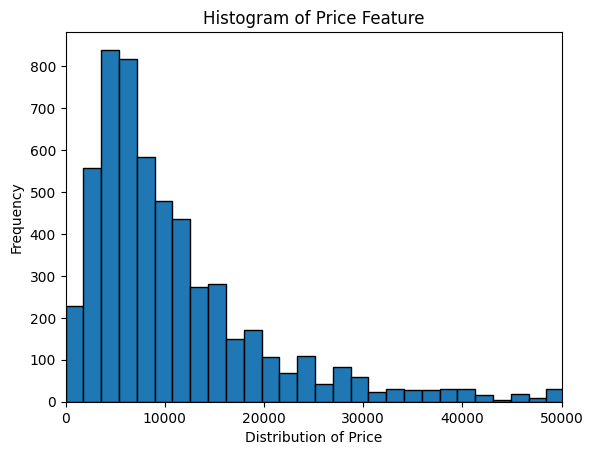

In [54]:
plt.hist(df_copy['Price'], bins=200, edgecolor='black')
plt.title('Histogram of Price Feature')
plt.xlabel('Distribution of Price')
plt.ylabel('Frequency')
plt.xlim(0,50000)

* This is right skewed distribution so the transformation recommended for this is logarithmic

### IQR Method:

In [55]:
Price = df_copy['Price']
sorted(Price)
Q1, Q3 = np.percentile(Price,[25,75])
print(Q1,Q3)

4950.0 14712.5


In [56]:
iqr = Q3-Q1
print(iqr)

9762.5


In [57]:
lower_bound = Q1-(1.5 * iqr)
upper_bound = Q3+(1.5 * iqr)
print(lower_bound,upper_bound)

-9693.75 29356.25


In [58]:
price_outliers = df_copy[(df_copy['Price'] < lower_bound) | (df_copy['Price'] > upper_bound)]
print(price_outliers)


         post_id  condition    fuel  odometer         type paint_color  \
1     7826018945  excellent     gas   71279.0       pickup       white   
8     7826012963  excellent  diesel   78000.0        truck       white   
29    7825970631  excellent     gas   52500.0          SUV       white   
33    7825966147  excellent     gas   29000.0        coupe       black   
34    7825964222  excellent     gas   14000.0        coupe       black   
...          ...        ...     ...       ...          ...         ...   
5591  7818661307  excellent     gas   98776.0      offroad       green   
5604  7818598518   like new     gas   32151.0  convertible         red   
5610  7818559523  excellent     gas   55317.0       pickup       white   
5611  7818559139  excellent     gas   88000.0      Missing       black   
5614  7818534917   like new     gas   65000.0       pickup     Missing   

     title_status                VIN transmission  Year     Price  \
1            lien  1FTFW1E8XNFB23421    au

* Just like before, the upper and lower bound are not very reasonble relative to the feature. I most likely will follow the same process as previously done for the odometer feature.

### Applying the Log Transformation to the Price Feature:

In [59]:
df_copy['log_Price'] = np.log1p(df_copy['Price'])
df_copy['log_Price']

0        7.313887
1       10.931338
2        8.853665
3       10.038936
4        9.047939
          ...    
5677     7.824446
5678     8.909370
5679     9.975855
5680     8.293049
5681     8.962007
Name: log_Price, Length: 5682, dtype: float64

In [60]:
log_Price = df_copy['log_Price']
sorted(log_Price)
Q1, Q3 = np.percentile(log_Price,[25,75])
print(Q1,Q3)

8.507344855361422 9.596510941685427


In [61]:
iqr = Q3-Q1
print(iqr)

1.0891660863240045


In [62]:
lower_bound = Q1-(1.5 * iqr)
upper_bound = Q3+(1.5 * iqr)
print(lower_bound,upper_bound)

6.873595725875416 11.230260071171433


In [63]:
price_outliers = df_copy[(df_copy['log_Price'] < lower_bound) | (df_copy['log_Price'] > upper_bound)]
print(price_outliers)


         post_id  condition    fuel  odometer     type paint_color  \
26    7825979501    Missing     gas       1.0  Missing     Missing   
34    7825964222  excellent     gas   14000.0    coupe       black   
40    7825949947   like new     gas   48000.0    sedan       white   
99    7825859633        new     gas     132.0      SUV        grey   
125   7825809060   like new  hybrid       1.0  Missing     Missing   
...          ...        ...     ...       ...      ...         ...   
5628  7818417188    Missing     gas  116000.0      SUV     Missing   
5632  7818365830    Missing     gas    1000.0  Missing     Missing   
5645  7818326279   like new     gas  156478.0      SUV       white   
5653  7818305466  excellent     gas  141000.0      SUV     Missing   
5667  7818250165    Missing     gas  120000.0    sedan     Missing   

     title_status                VIN transmission  Year     Price  \
26          clean            Missing    automatic  2013     123.0   
34          clean    

* Notice that before the log tranformation, the IQR found 451 instances to be outliers, but after the log transformation, only 155 were found to be outliers.

Text(0.5, 1.0, 'Boxplot of Log-Transformed Price')

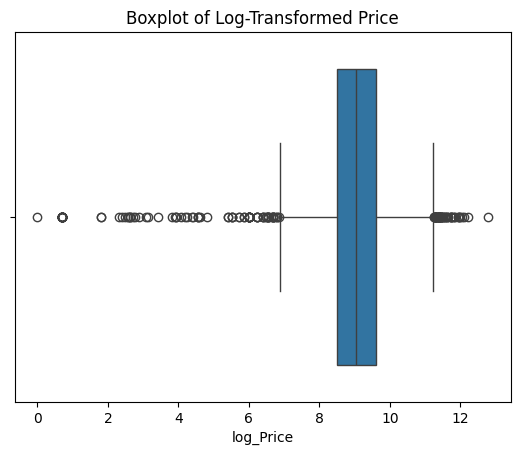

In [64]:
sns.boxplot(x=df_copy['log_Price'])
plt.title('Boxplot of Log-Transformed Price')

Text(0, 0.5, 'Frequency')

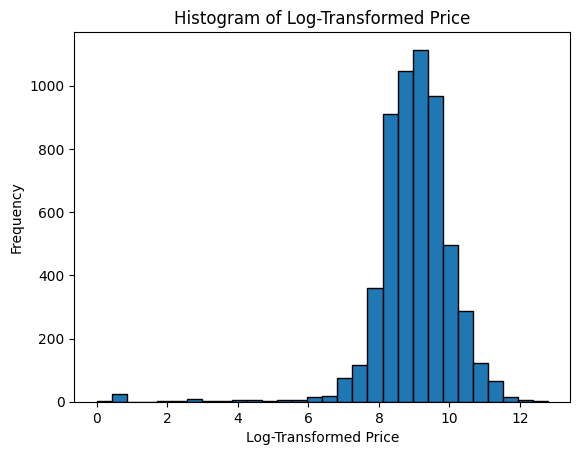

In [65]:
plt.hist(df_copy['log_Price'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')

* WRITE STUFF

### Z Score Method for the Price Feature:

In [66]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_copy['log_Price']))
outiers = df_copy[z_scores>3]
print(outiers)

         post_id  condition    fuel  odometer     type paint_color  \
26    7825979501    Missing     gas       1.0  Missing     Missing   
125   7825809060   like new  hybrid       1.0  Missing     Missing   
406   7825114432       good  diesel  200000.0    truck         red   
496   7824991660    Missing     gas   84300.0  Missing     Missing   
887   7824052324    Missing     gas   71590.0    coupe       black   
...          ...        ...     ...       ...      ...         ...   
5605  7818588727       fair     gas  242641.0    truck      yellow   
5628  7818417188    Missing     gas  116000.0      SUV     Missing   
5632  7818365830    Missing     gas    1000.0  Missing     Missing   
5645  7818326279   like new     gas  156478.0      SUV       white   
5653  7818305466  excellent     gas  141000.0      SUV     Missing   

     title_status                VIN transmission  Year  Price  \
26          clean            Missing    automatic  2013  123.0   
125       missing          

In [67]:
data = df_copy.copy()
outlier_indices = data[z_scores > 1.5].index
data = data.drop(outlier_indices)
print(f"Removed {len(outlier_indices)} outliers")

Removed 419 outliers


Text(0.5, 1.0, 'After Outlier Removal')

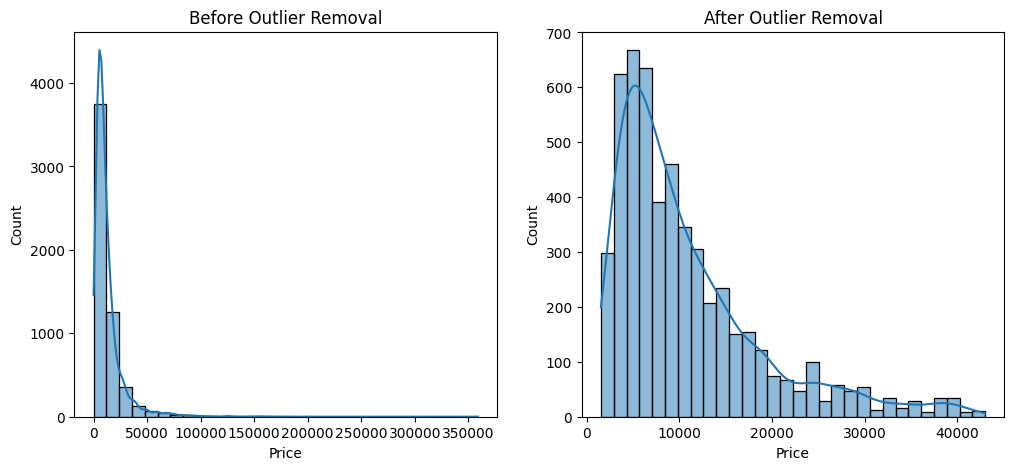

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_copy['Price'], bins=30, ax=axes[0], kde=True).set_title("Before Outlier Removal")
sns.histplot(data['Price'], bins=30, ax=axes[1], kde=True).set_title("After Outlier Removal")


Text(0.5, 1.0, 'After Outlier Removal')

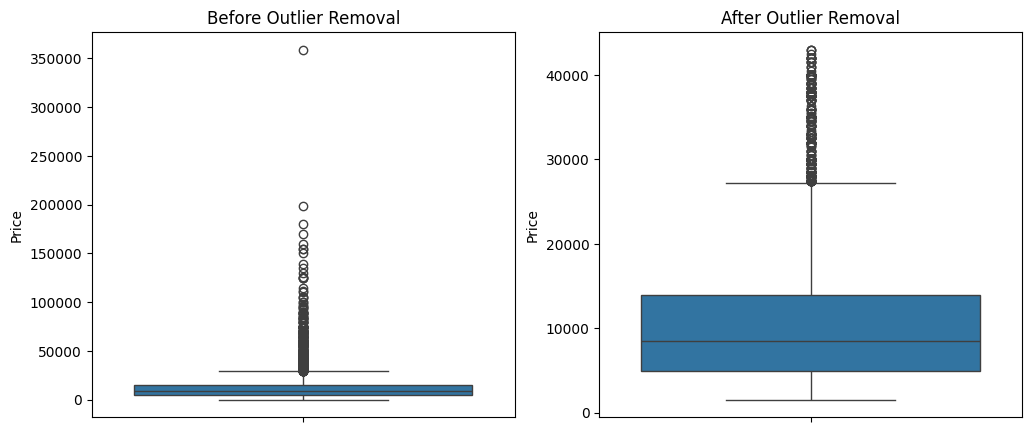

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(df_copy['Price'], ax=axes[0]).set_title("Before Outlier Removal")
sns.boxplot(data['Price'], ax=axes[1]).set_title("After Outlier Removal")


In [70]:
data['Price'].describe()

count     5263.000000
mean     10843.393692
std       8029.352253
min       1550.000000
25%       5000.000000
50%       8499.000000
75%      13995.000000
max      43000.000000
Name: Price, dtype: float64

---

### Vizualization idea to consider and remember:

* a bar chart to show the frequency of the categories of the make of vehicles once ive create a seperate feature for it.
* idea is to create feature with the calculated odometer of how many miles it should have per year
* consider replacing outliers for odometer using the median of the age group so like every year should have about 12k miles.

---

# Detecting Outliers from a Multi-dimensonal perspective:

In [71]:
data_copy = df_copy.copy()
data_copy['age'] = 2025 - data_copy['Year']
data_copy.shape

(5682, 19)

In [72]:
from outliers.multi_columns import train_isolation_forest
from outliers.multi_columns import get_anomaly_and_score, get_outliers_index, plot_anomaly

features = ['odometer','age','Price']

clf = train_isolation_forest(data_copy, features)

new_data = get_anomaly_and_score(data_copy, features, clf)

outlier_index, clean_index = get_outliers_index(new_data, mode = 'normal', threshold = -0.5 , percent = 0.5)
print(new_data['anomaly'].value_counts())

anomaly
 1    4937
-1     745
Name: count, dtype: int64


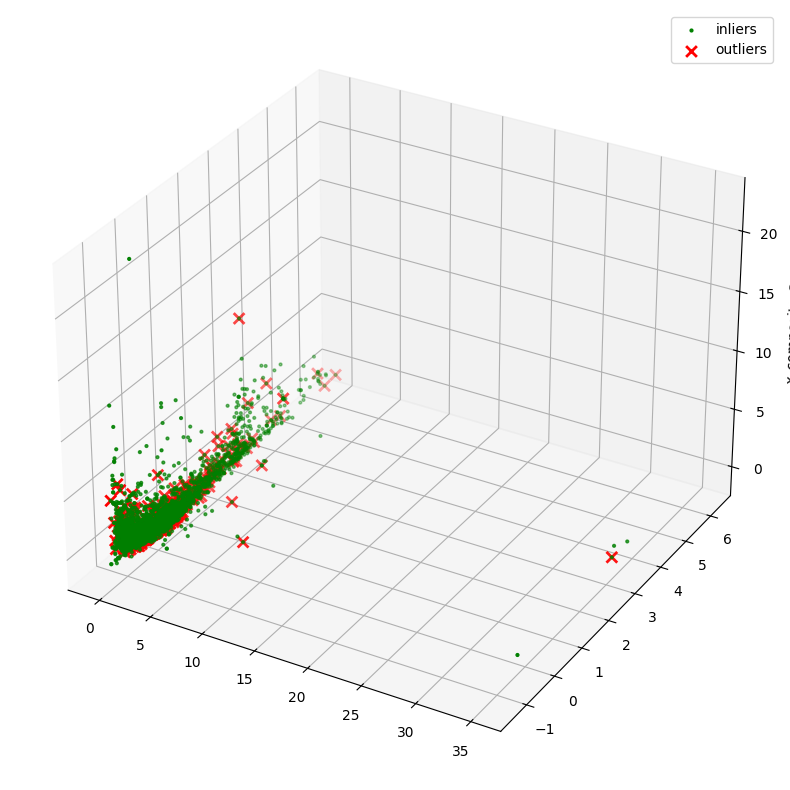

In [73]:
plot_anomaly(new_data, features, outlier_index, clean_index,mode = '3D')

## More Conservative Anamolies:

<Axes: >

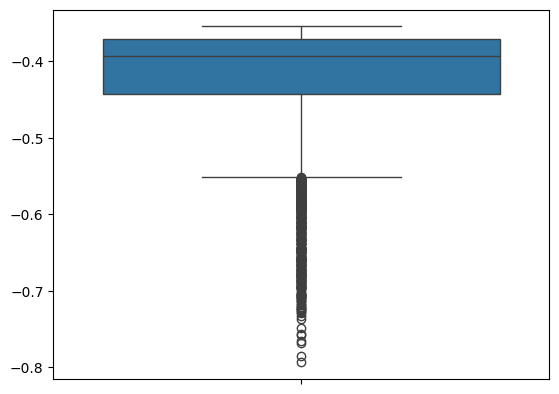

In [74]:
X_train = new_data[features]
sns.boxplot(clf.score_samples(X_train))

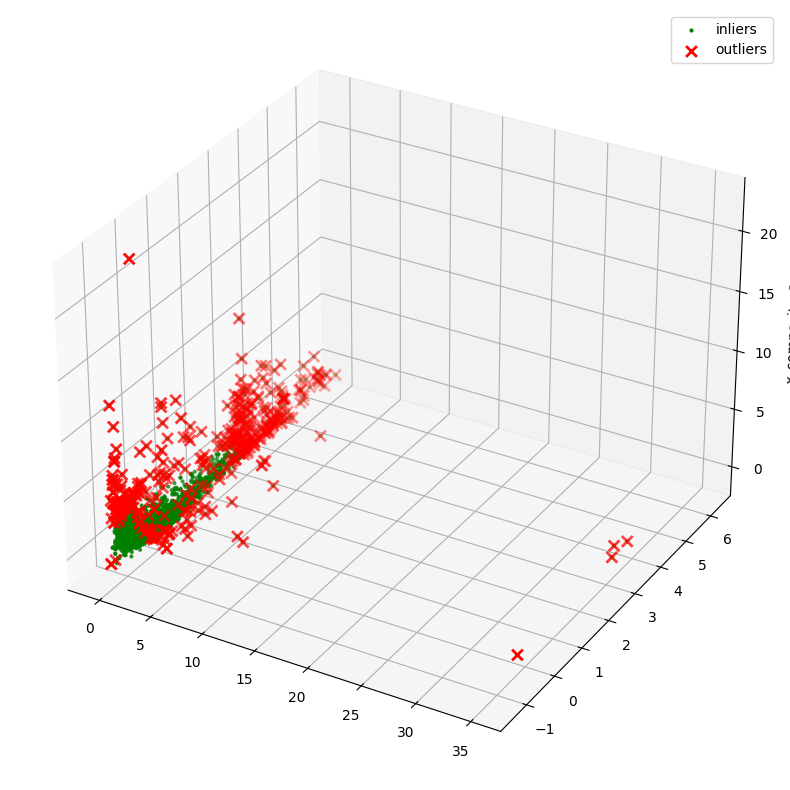

Detected there to be 397 outliers.


In [75]:
outlier_index, clean_index = get_outliers_index(new_data, mode = 'threshold', threshold = -0.55)
plot_anomaly(new_data, features, outlier_index, clean_index,mode = '3D')
print(f"Detected there to be {len(outlier_index)} outliers.")

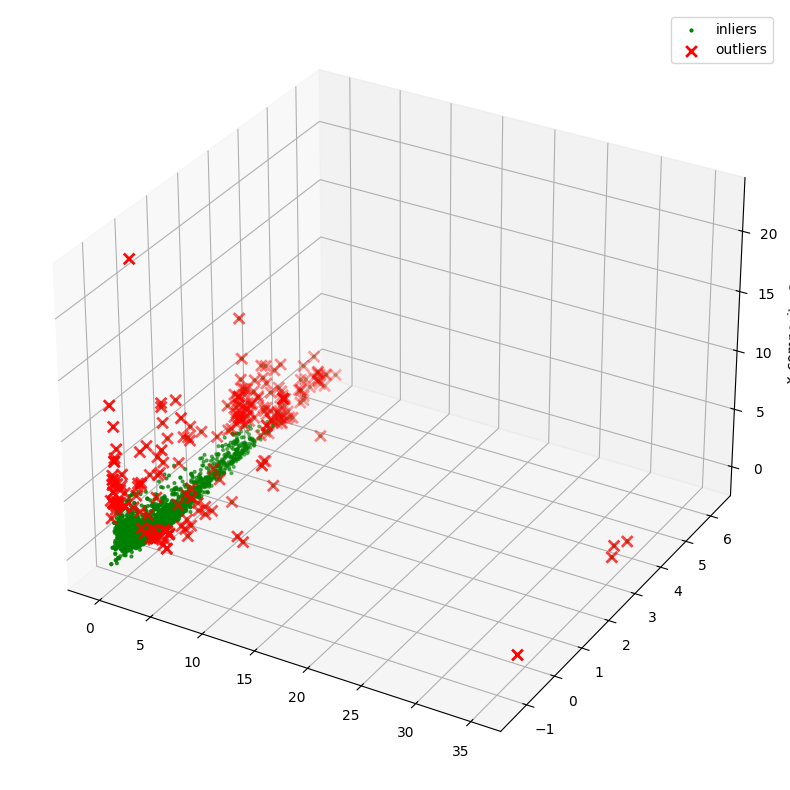

Detected there to be 226 outliers.


In [76]:
outlier_index, clean_index = get_outliers_index(new_data, mode = 'threshold', threshold = -0.60)
plot_anomaly(new_data, features, outlier_index, clean_index,mode = '3D')
print(f"Detected there to be {len(outlier_index)} outliers.")

## Percent of most anomalous values:

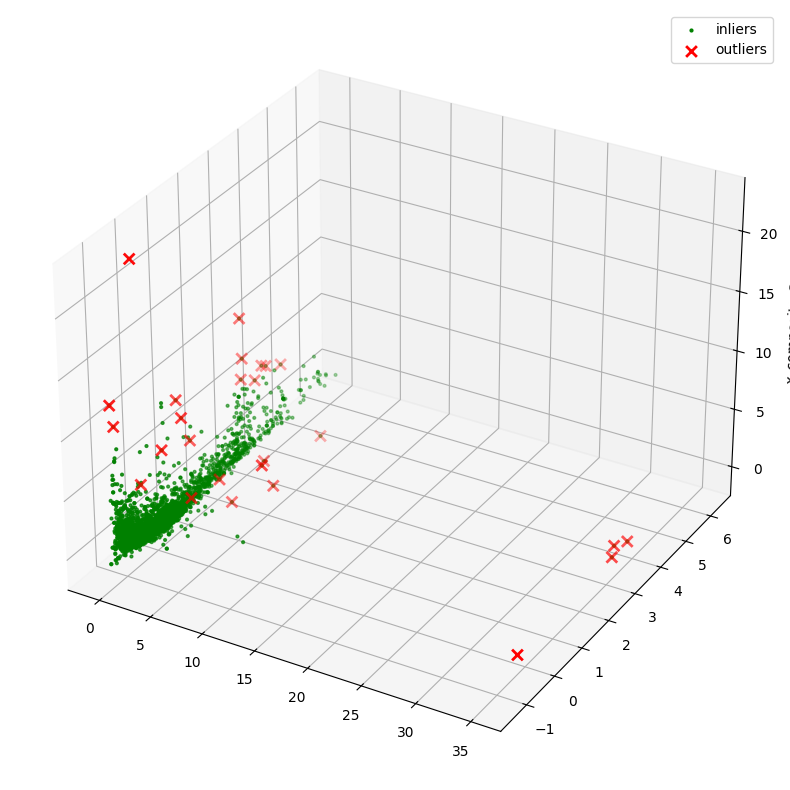

Detected there to be 27 outliers.


In [77]:
outlier_index, clean_index = get_outliers_index(new_data, mode = 'percent', percent = 0.5)
plot_anomaly(new_data, features, outlier_index, clean_index, mode = '3D')
print(f"Detected there to be {len(outlier_index)} outliers.")

---

# Temporarily Handling Outliers (Removal):

## Removal with Algorithm:

In [78]:
outlier_index, clean_index = get_outliers_index(new_data, mode = 'threshold', threshold = -0.55)
print("Decided to use the 'threshold' mode with e a threshold of -0.55")

Decided to use the 'threshold' mode with e a threshold of -0.55


In [79]:
print(f"Detected there to be {len(outlier_index)} outliers.")

Detected there to be 397 outliers.


In [80]:
# Get outlier values for specific features
outlier_values = new_data[features].iloc[outlier_index]
print(outlier_values)


      odometer  age     Price
1      71279.0    3   55900.0
14      1600.0   58   12000.0
25     15395.0   52   25750.0
33     29000.0   47   37500.0
34     14000.0   58  180000.0
...        ...  ...       ...
5572   46000.0   11   65000.0
5574  123456.0   60   17000.0
5591   98776.0   53   39000.0
5611   88000.0   49   44900.0
5616  789567.0   11    1650.0

[397 rows x 3 columns]


In [81]:
new_data_clean = new_data.copy()
new_data_clean.shape

(5682, 21)

In [82]:

new_data_clean = new_data_clean.drop(outlier_index)
new_data_clean.shape

(5285, 21)

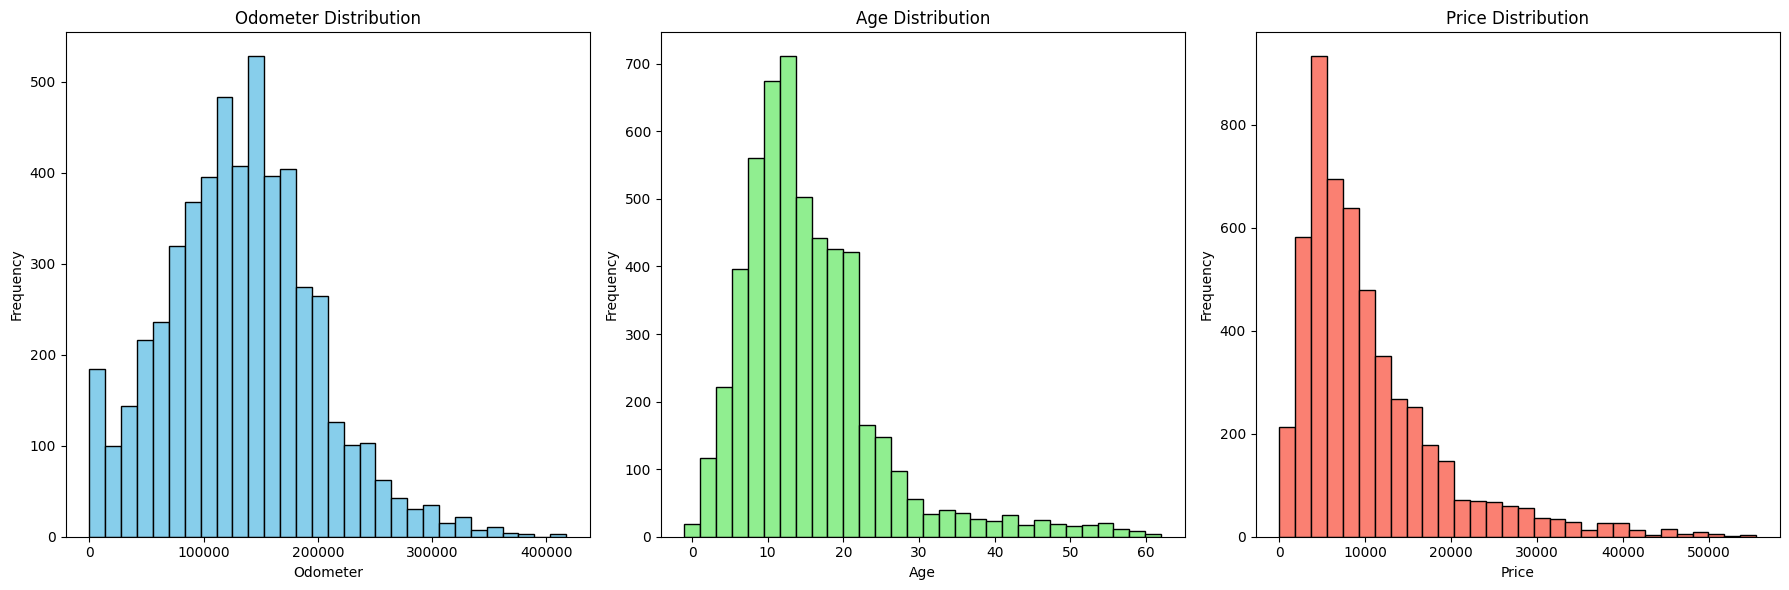

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(new_data_clean['odometer'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Odometer Distribution')
axes[0].set_xlabel('Odometer')
axes[0].set_ylabel('Frequency')

axes[1].hist(new_data_clean['age'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

axes[2].hist(new_data_clean['Price'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Price Distribution')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

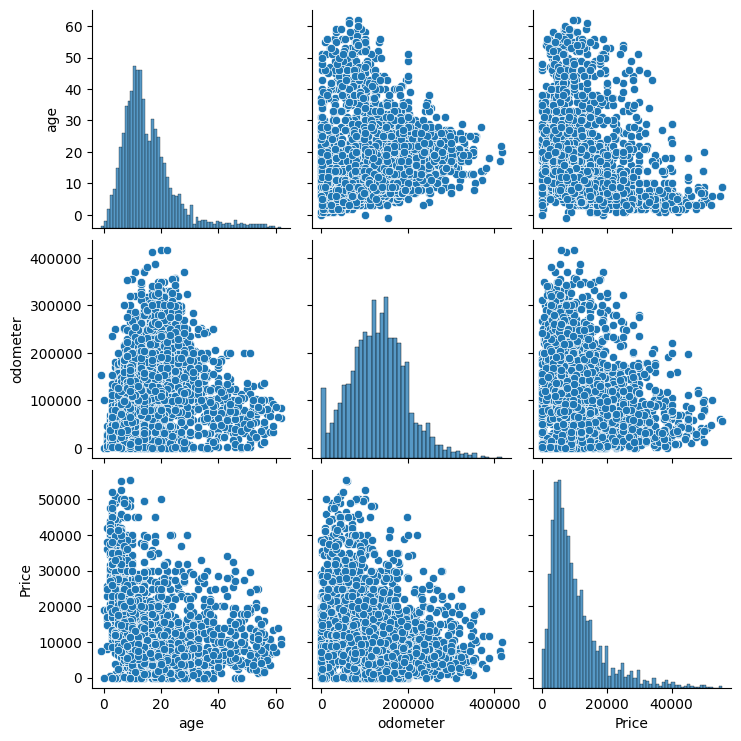

In [84]:
sns.pairplot(new_data_clean[['age','odometer','Price']])

In [85]:
new_data_clean[['odometer','Price']].describe()

,odometer,Price
count,5285.000000,5285.000000
mean,132945.624219,10452.463955
std,65952.530599,8400.116319
min,1.000000,0.000000
25%,88000.000000,4900.000000
50%,131000.000000,7999.000000
75%,174000.000000,13500.000000
max,417310.000000,55519.000000


**Observations:**
* Notice that there are still extreme outliers that are unreasonably low to be legitimate outliers that the algorithm didn't properly detect. This can because the outliers weren't isolated enough like the larger values detected as outliers.
* Thankfully though, the algorithm was successful in detecting the extreme large outliers since they were isolated from the rest of the data.
* And it appears to be that the odometer and price features are more normalized after the removal of the outliers, which is as expected.

## Outlier Removal Per Feature:

### Price Feature:

In [86]:
z_scores = np.abs(stats.zscore(new_data_clean['log_Price']))
outiers = new_data_clean[z_scores>2.5]
print(outiers)

         post_id  condition      fuel  odometer     type paint_color  \
26    7825979501    Missing       gas       1.0  Missing     Missing   
406   7825114432       good    diesel  200000.0    truck         red   
418   7825090093    Missing       gas  150000.0    sedan     Missing   
421   7825089549    Missing  electric  150000.0    coupe     Missing   
422   7825088458    Missing       gas  150000.0      SUV     Missing   
...          ...        ...       ...       ...      ...         ...   
5605  7818588727       fair       gas  242641.0    truck      yellow   
5628  7818417188    Missing       gas  116000.0      SUV     Missing   
5632  7818365830    Missing       gas    1000.0  Missing     Missing   
5645  7818326279   like new       gas  156478.0      SUV       white   
5653  7818305466  excellent       gas  141000.0      SUV     Missing   

     title_status                VIN transmission  Year  ...  \
26          clean            Missing    automatic  2013  ...   
406    

In [87]:
z_data= new_data_clean.copy()
price_indices = z_data[z_scores > 2.5].index
outlier_indices = z_data[z_scores > 2.5].index
outlier_values = z_data[features].loc[outlier_indices]
z_data = z_data.drop(outlier_indices)
print(f"Removed {len(outlier_indices)} outliers")
print(outlier_values)


Removed 72 outliers
      odometer  age  Price
26         1.0   12  123.0
406   200000.0   36    1.0
418   150000.0   13  400.0
421   150000.0   10  400.0
422   150000.0    9  400.0
...        ...  ...    ...
5605  242641.0   35    1.0
5628  116000.0   20   10.0
5632    1000.0    3    1.0
5645  156478.0    9   17.0
5653  141000.0    9   58.0

[72 rows x 3 columns]


Text(0.5, 1.0, 'After Outlier Removal')

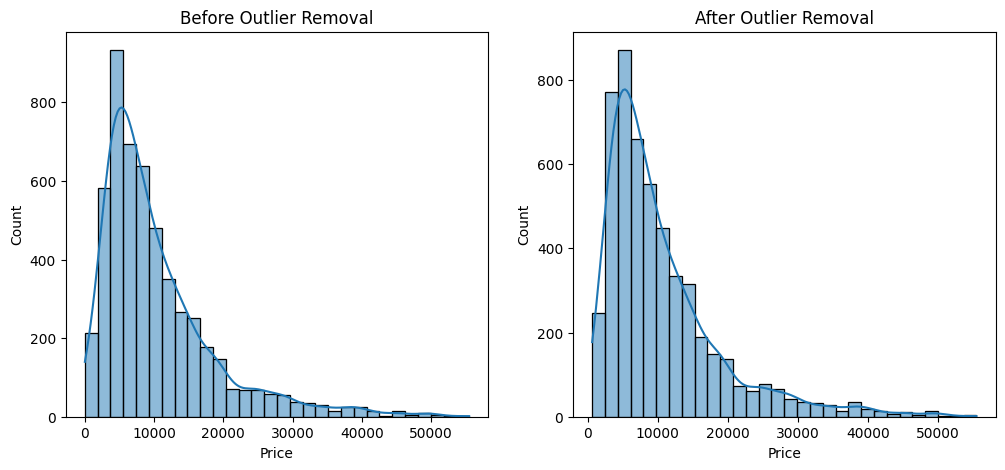

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(new_data_clean['Price'], bins=30, ax=axes[0], kde=True).set_title("Before Outlier Removal")
sns.histplot(z_data['Price'], bins=30, ax=axes[1], kde=True).set_title("After Outlier Removal")


In [89]:
z_data['Price'].describe()

count     5213.000000
mean     10594.627086
std       8369.733435
min        650.000000
25%       4950.000000
50%       8000.000000
75%      13500.000000
max      55519.000000
Name: Price, dtype: float64

### Odometer Feature:

In [90]:
z_scores = np.abs(stats.zscore(new_data_clean['log_odometer']))
outiers = new_data_clean[z_scores>2.5]
print(outiers)

         post_id  condition    fuel  odometer       type paint_color  \
26    7825979501    Missing     gas       1.0    Missing     Missing   
38    7825956664       good  diesel    1000.0    Missing     Missing   
39    7825950219    Missing     gas     138.0    Missing     Missing   
152   7825724567    Missing  diesel    1000.0      truck     Missing   
249   7825444193   like new     gas    1927.0        van       white   
...          ...        ...     ...       ...        ...         ...   
5597  7818639930   like new  hybrid    4606.0      sedan        grey   
5601  7818627202    salvage     gas       1.0  hatchback      silver   
5632  7818365830    Missing     gas    1000.0    Missing     Missing   
5658  7818278747  excellent     gas     109.0      sedan       white   
5677  7818179438  excellent  diesel    1290.0      truck       white   

     title_status                VIN transmission  Year  ...  \
26          clean            Missing    automatic  2013  ...   
38     

In [91]:
y_data= new_data_clean.copy()
odometer_indices = y_data[z_scores > 2.5].index
outlier_indices = y_data[z_scores > 2.5].index
outlier_values = y_data[features].loc[outlier_indices]
y_data = y_data.drop(outlier_indices)
print(f"Removed {len(outlier_indices)} outliers")
print(outlier_values)

Removed 123 outliers
      odometer  age    Price
26         1.0   12    123.0
38      1000.0   29  13500.0
39       138.0   15  10500.0
152     1000.0   11  18500.0
249     1927.0    8  35000.0
...        ...  ...      ...
5597    4606.0    5  17499.0
5601       1.0   36   1000.0
5632    1000.0    3      1.0
5658     109.0    6   7300.0
5677    1290.0    5   2500.0

[123 rows x 3 columns]


Text(0.5, 1.0, 'After Outlier Removal')

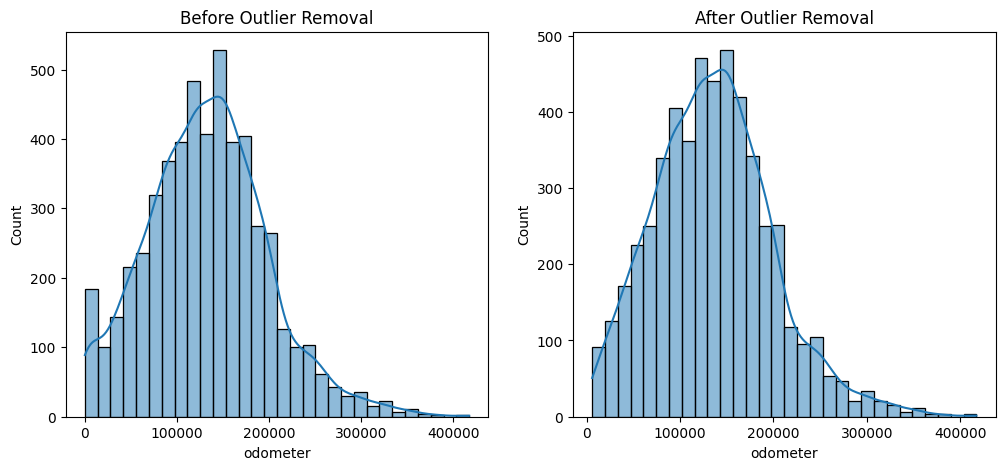

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(new_data_clean['odometer'], bins=30, ax=axes[0], kde=True).set_title("Before Outlier Removal")
sns.histplot(y_data['odometer'], bins=30, ax=axes[1], kde=True).set_title("After Outlier Removal")


In [93]:
y_data['odometer'].describe()

count      5162.000000
mean     136089.598024
std       63470.930932
min        6000.000000
25%       91520.000000
50%      134000.000000
75%      175000.000000
max      417310.000000
Name: odometer, dtype: float64

### Outlier Removal for the Odometer and Price Features:

In [99]:
x_data = new_data_clean.copy()
indices =  price_indices.union(odometer_indices).tolist()
print(x_data.shape)
print(len(indices))


(5285, 21)
186


In [100]:
x_data.shape
x_data = x_data.drop(indices)
x_data.shape

(5099, 21)

---

# Visualizing and Exploring the Preprocessed Data:

## Exploring Numerical Features to Target variable:

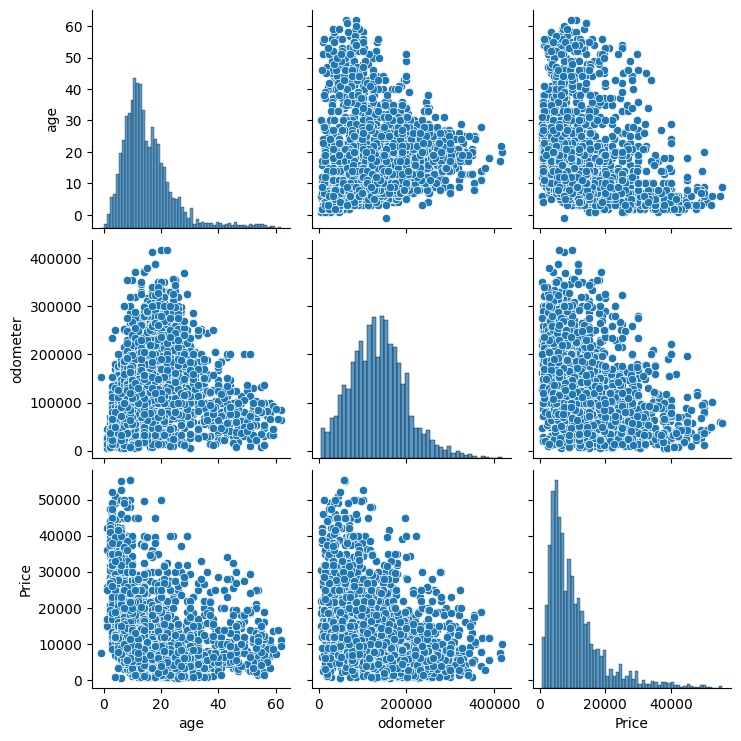

In [101]:
sns.pairplot(x_data[['age','odometer','Price']])

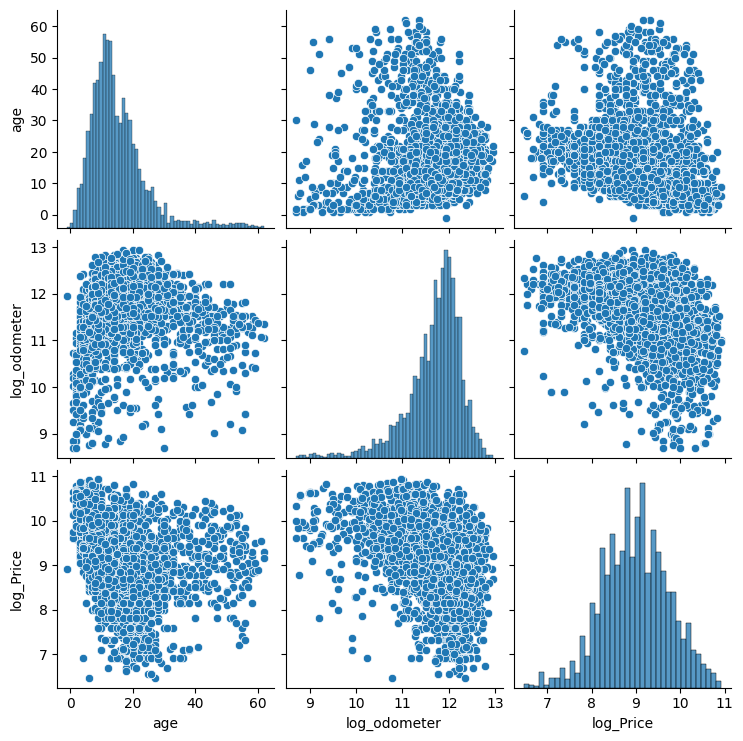

In [131]:
sns.pairplot(x_data[['age','log_odometer','log_Price']])

<Axes: xlabel='age', ylabel='Price'>

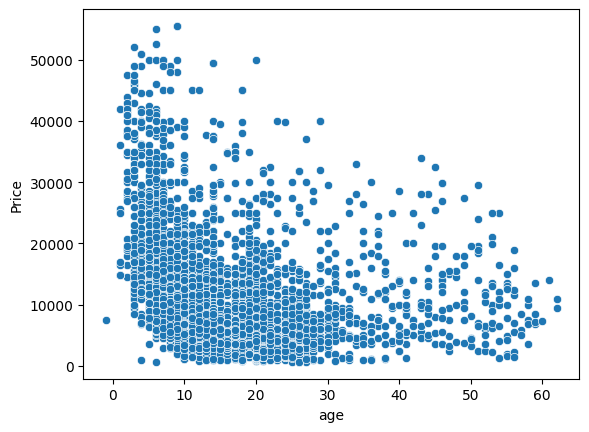

In [135]:
sns.scatterplot(x=x_data['age'],y=x_data['Price'],)

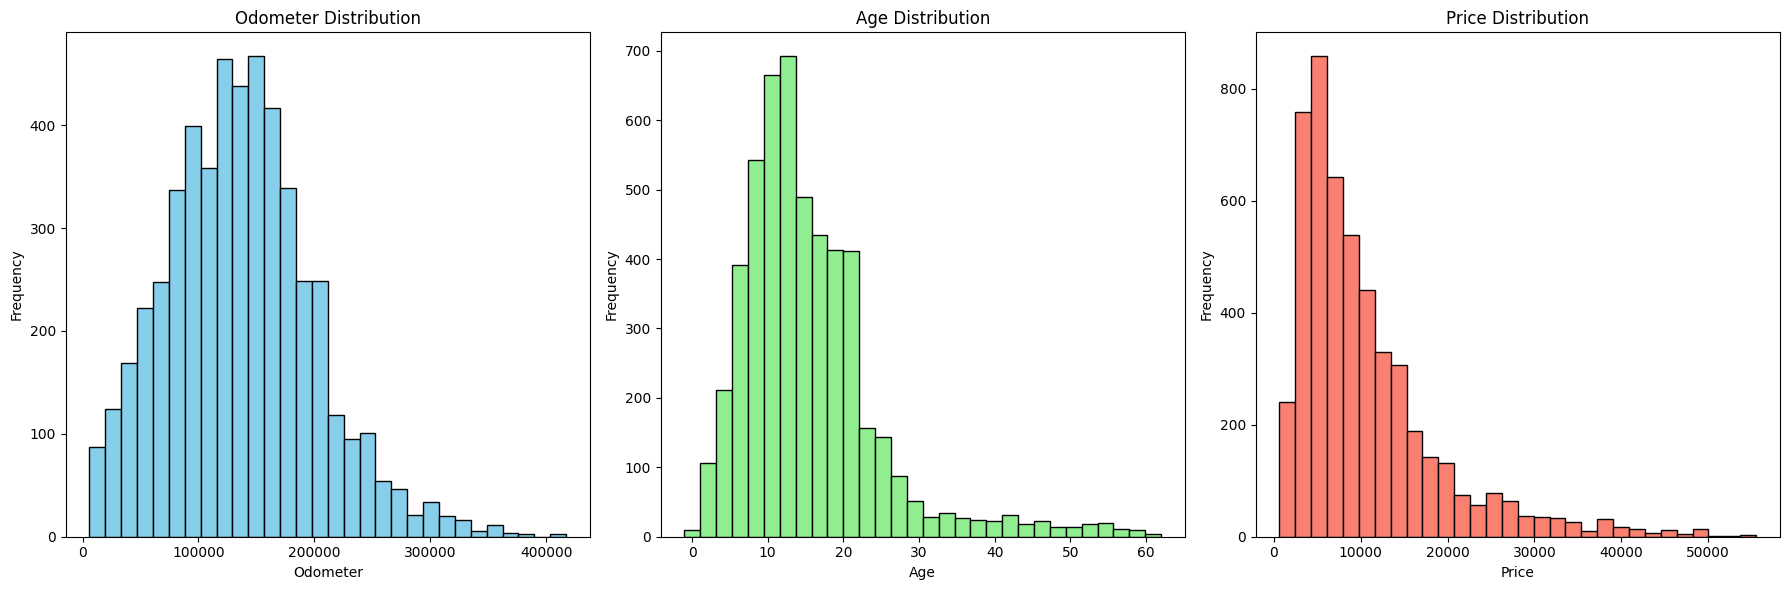

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(x_data['odometer'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Odometer Distribution')
axes[0].set_xlabel('Odometer')
axes[0].set_ylabel('Frequency')

axes[1].hist(x_data['age'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

axes[2].hist(x_data['Price'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Price Distribution')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

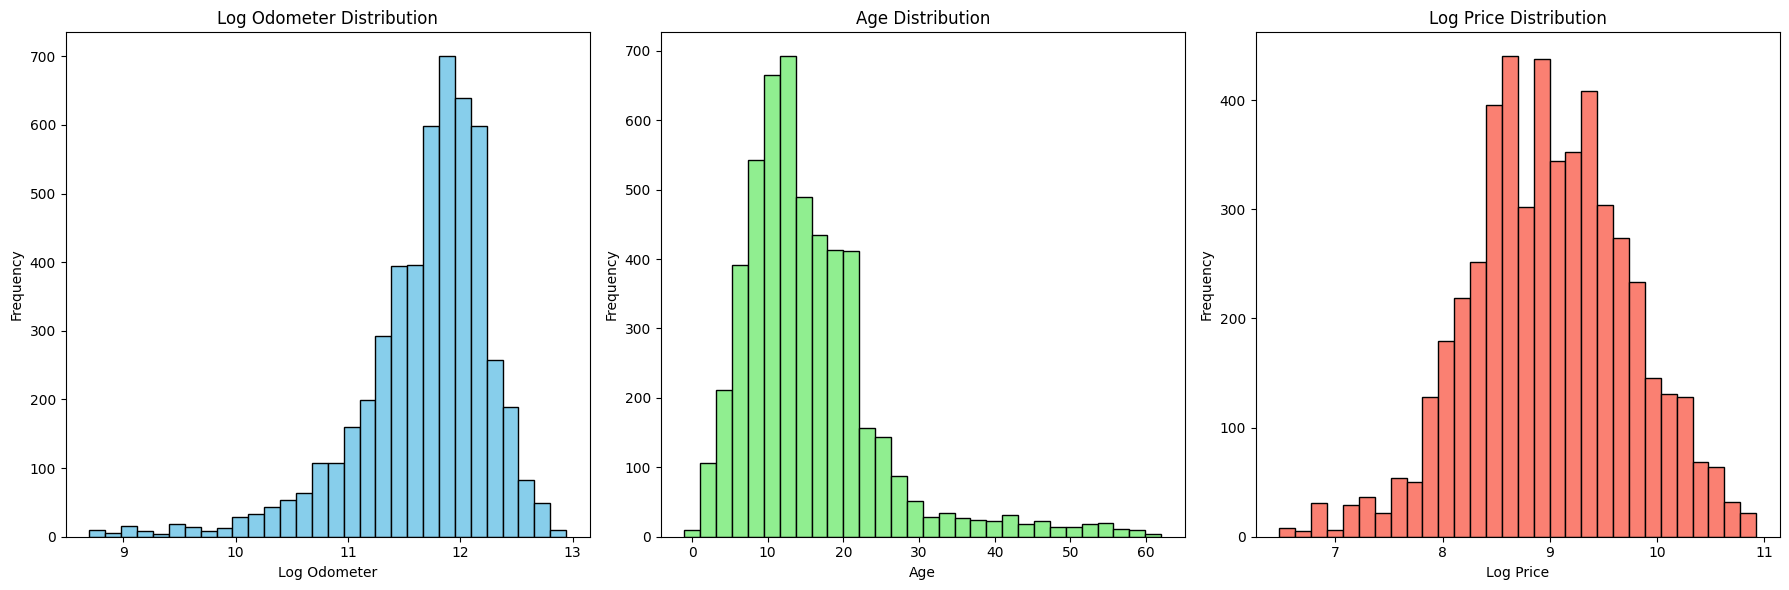

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(x_data['log_odometer'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Log Odometer Distribution')
axes[0].set_xlabel('Log Odometer')
axes[0].set_ylabel('Frequency')

axes[1].hist(x_data['age'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

axes[2].hist(x_data['log_Price'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Log Price Distribution')
axes[2].set_xlabel('Log Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

In [107]:
corr_matrix = x_data[features].corr()
print(corr_matrix)

          odometer       age     Price
odometer  1.000000  0.143552 -0.425842
age       0.143552  1.000000 -0.258798
Price    -0.425842 -0.258798  1.000000


In [129]:
corr_matrix = x_data[['log_odometer','age','log_Price']].corr()
print(corr_matrix)

              log_odometer       age  log_Price
log_odometer      1.000000  0.126037  -0.463341
age               0.126037  1.000000  -0.281317
log_Price        -0.463341 -0.281317   1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

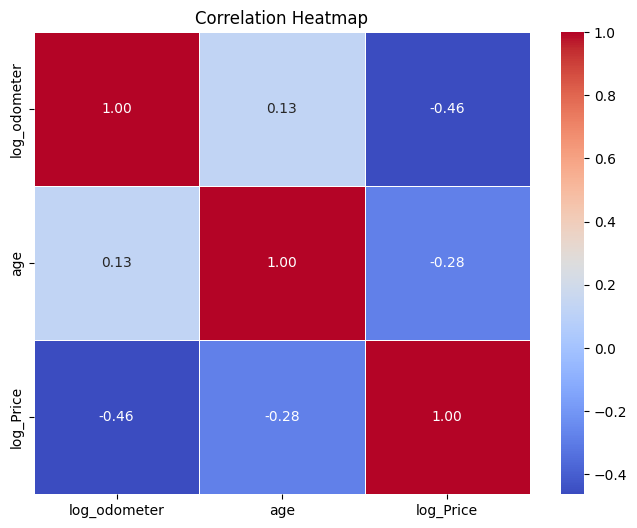

In [121]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

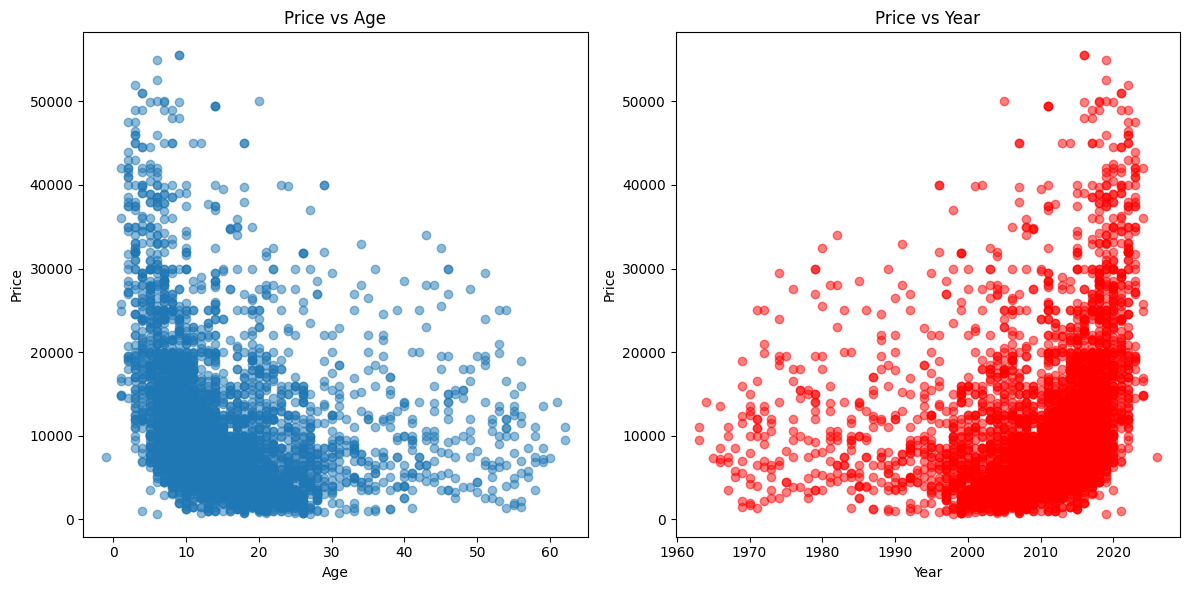

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(x_data['age'], x_data['Price'], alpha=0.5)
ax[0].set_title('Price vs Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Price')

ax[1].scatter(x_data['Year'], x_data['Price'], alpha=0.5, color='red')
ax[1].set_title('Price vs Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Price')

plt.tight_layout()

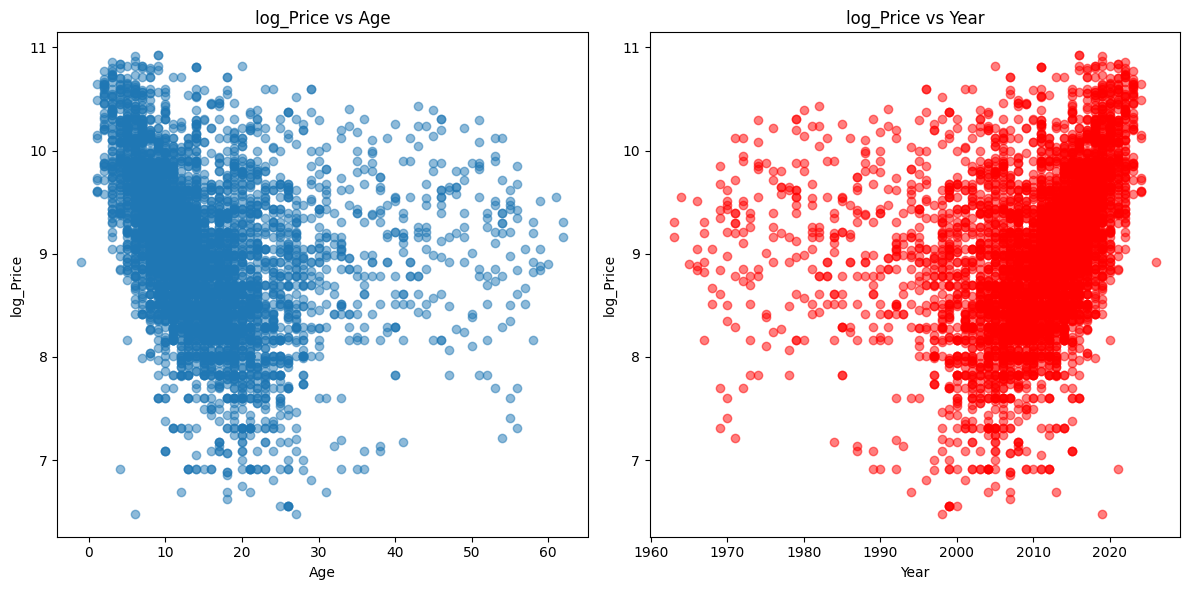

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(x_data['age'], x_data['log_Price'], alpha=0.5)
ax[0].set_title('log_Price vs Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('log_Price')

ax[1].scatter(x_data['Year'], x_data['log_Price'], alpha=0.5, color='red')
ax[1].set_title('log_Price vs Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('log_Price')

plt.tight_layout()

---

## Exploring Categorical Features to Target Variable:

In [141]:
categorical_features

['condition',
 'fuel',
 'type',
 'paint_color',
 'title_status',
 'transmission',
 'cylinders',
 'drive']

In [143]:
for feature in x_data[categorical_features]:
    print(f"\nCategories in {feature} variable:",x_data[feature].unique())


Categories in condition variable: ['good' 'excellent' 'Missing' 'like new' 'salvage' 'fair' 'new']

Categories in fuel variable: ['gas' 'diesel' 'hybrid' 'other' 'electric']

Categories in type variable: ['SUV' 'convertible' 'sedan' 'pickup' 'truck' 'coupe' 'hatchback'
 'Missing' 'minivan' 'van' 'wagon' 'other' 'bus' 'offroad']

Categories in paint_color variable: ['black' 'white' 'blue' 'grey' 'silver' 'Missing' 'red' 'orange' 'brown'
 'green' 'custom' 'purple' 'yellow']

Categories in title_status variable: ['clean' 'salvage' 'rebuilt' 'lien' 'missing' 'parts only']

Categories in transmission variable: ['automatic' 'manual' 'other']

Categories in cylinders variable: ['6 cylinders' '4 cylinders' 'Missing' '8 cylinders' '10 cylinders'
 '5 cylinders' '3 cylinders' 'other' '12 cylinders']

Categories in drive variable: ['fwd' 'rwd' 'Missing' '4wd']


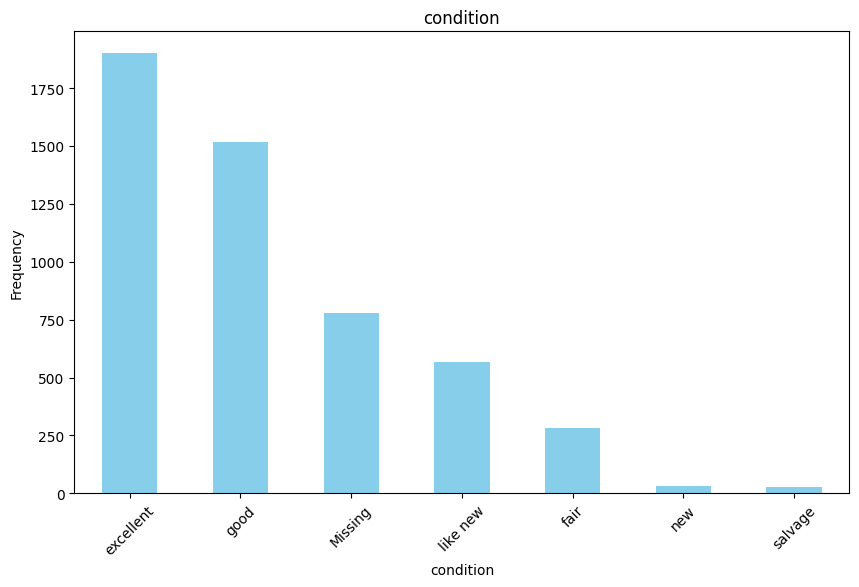

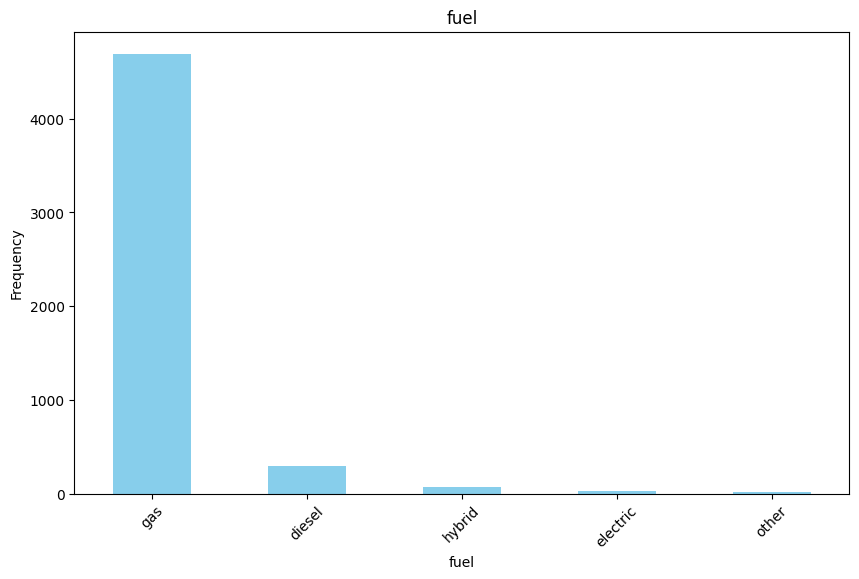

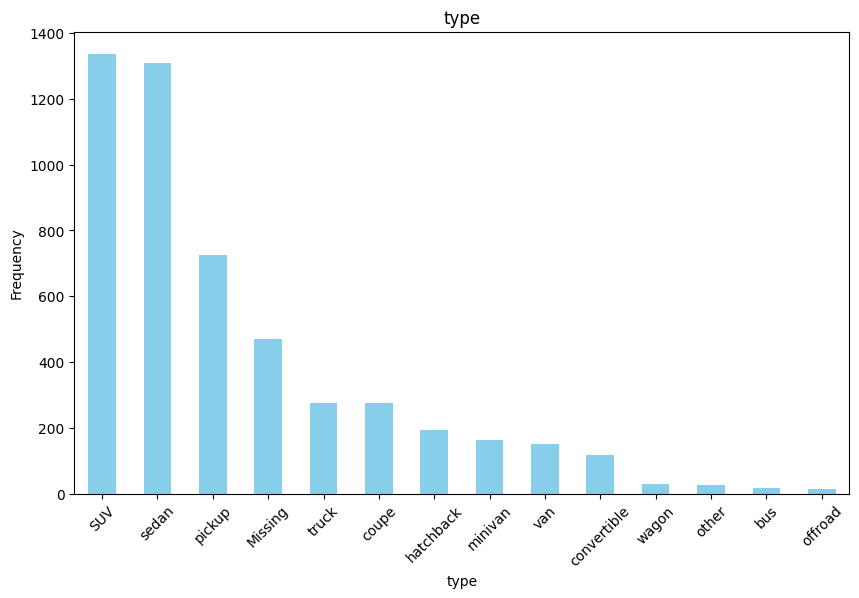

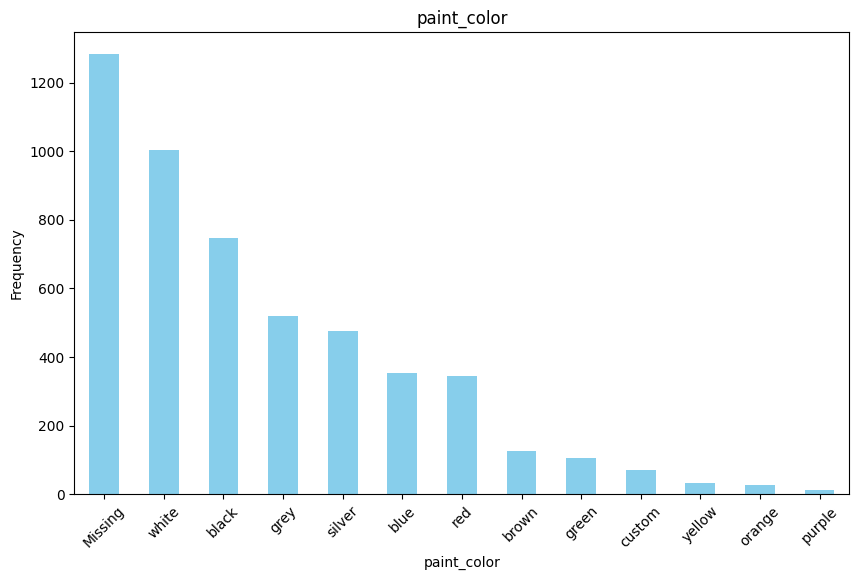

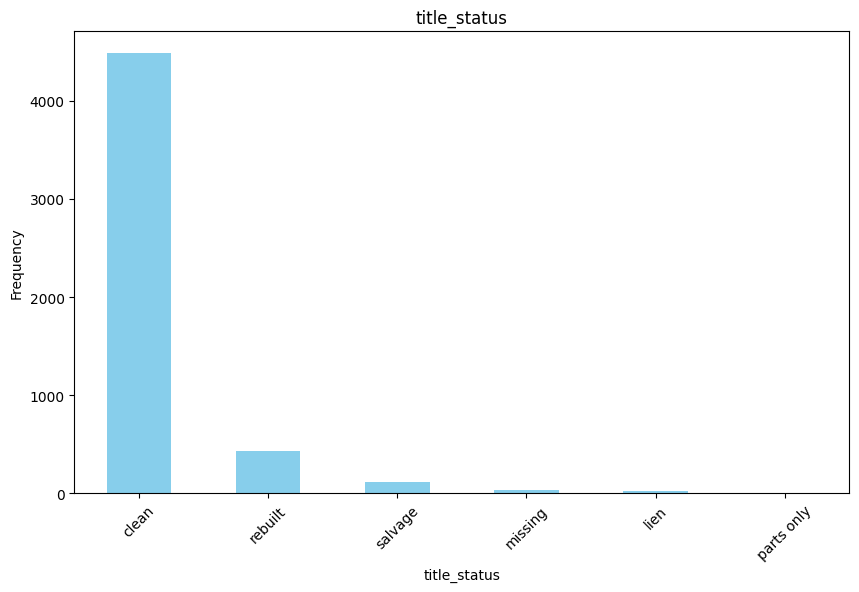

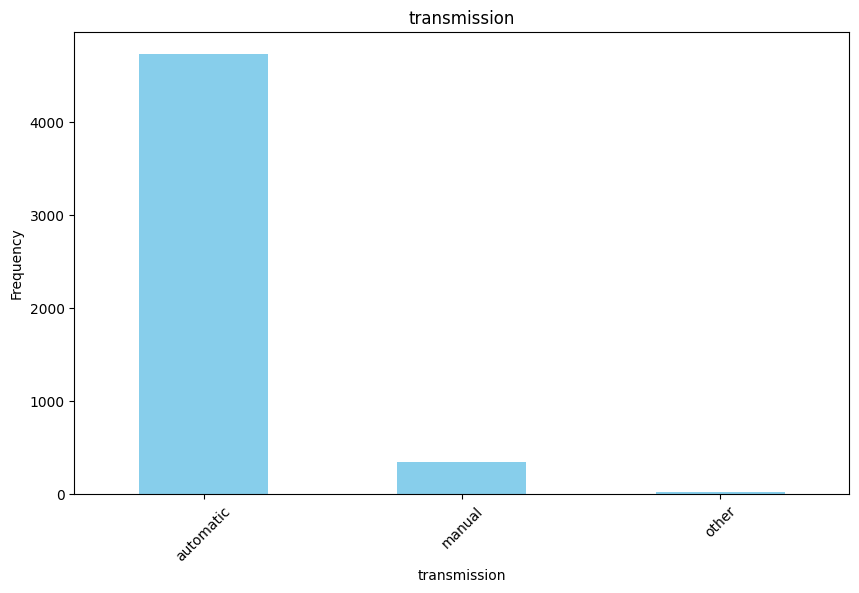

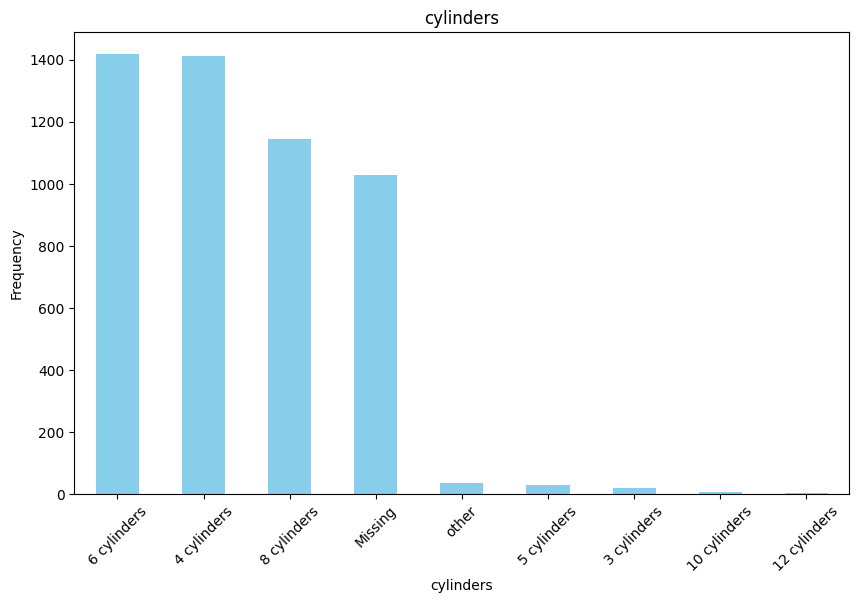

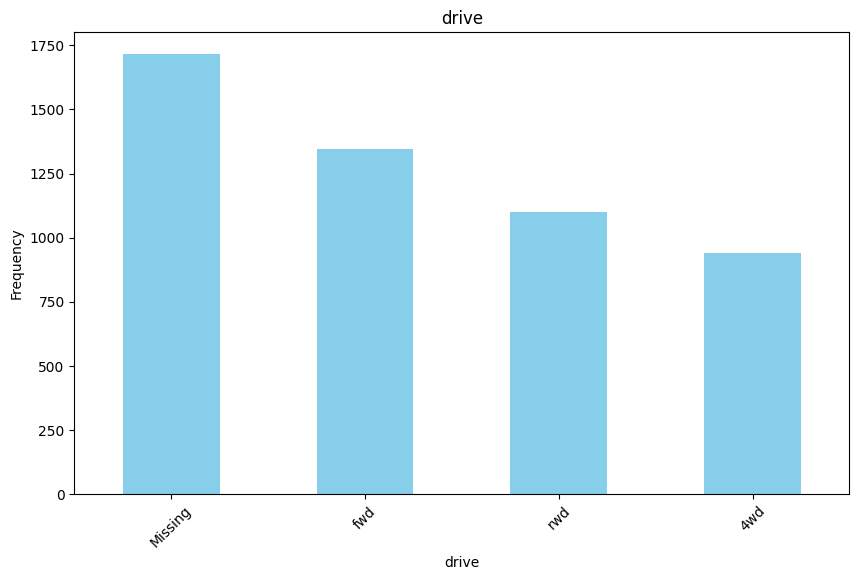

In [151]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    x_data[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

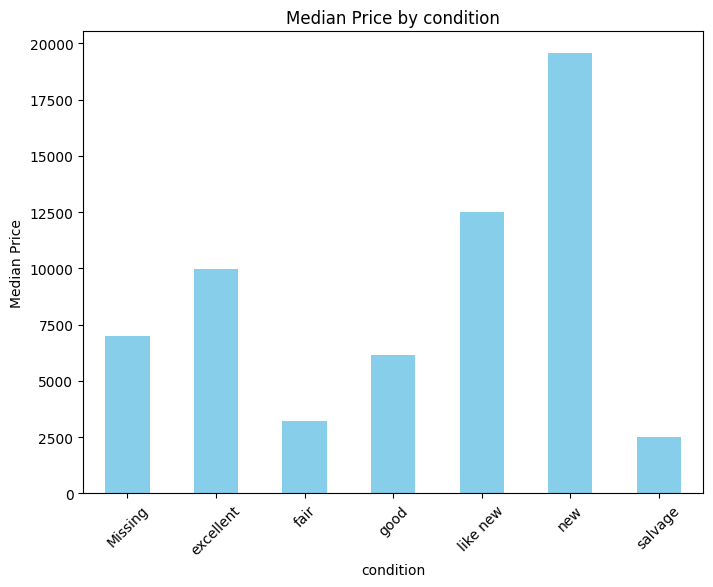

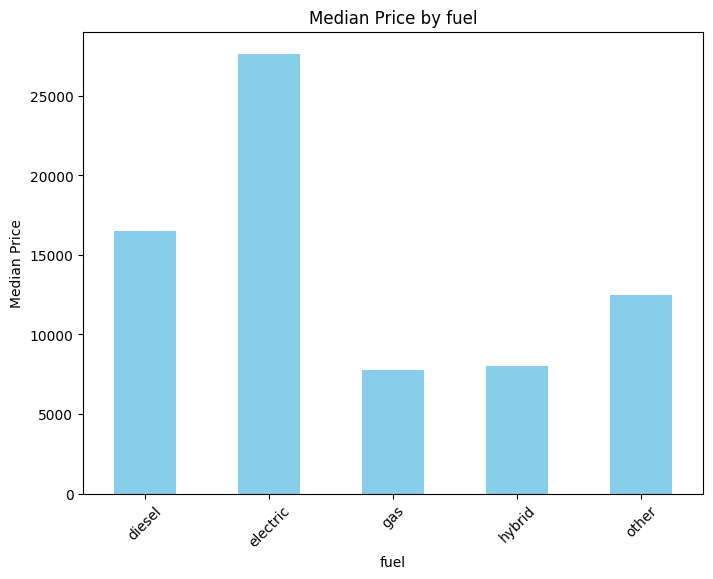

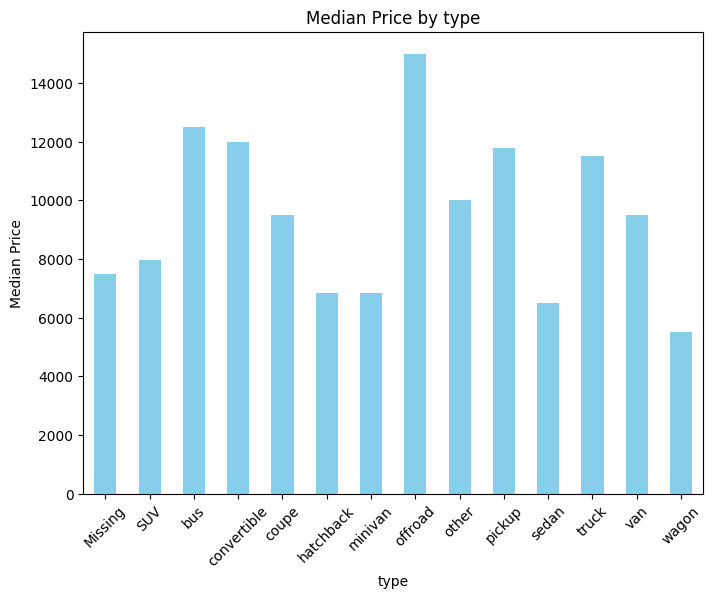

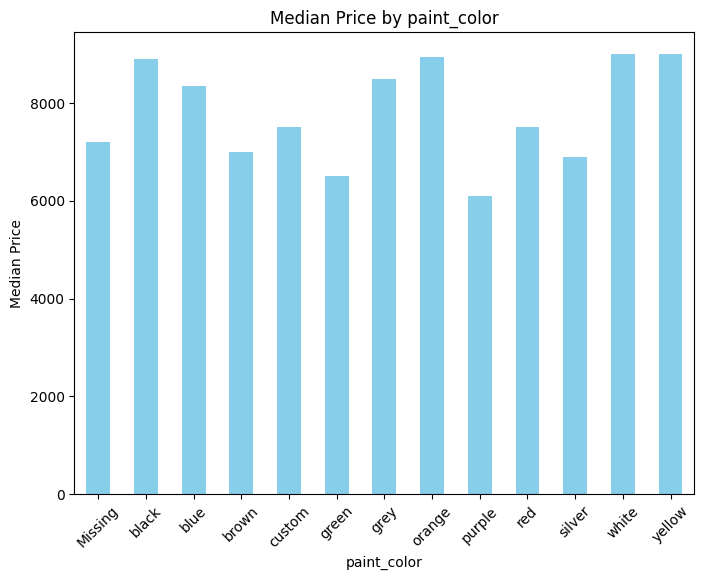

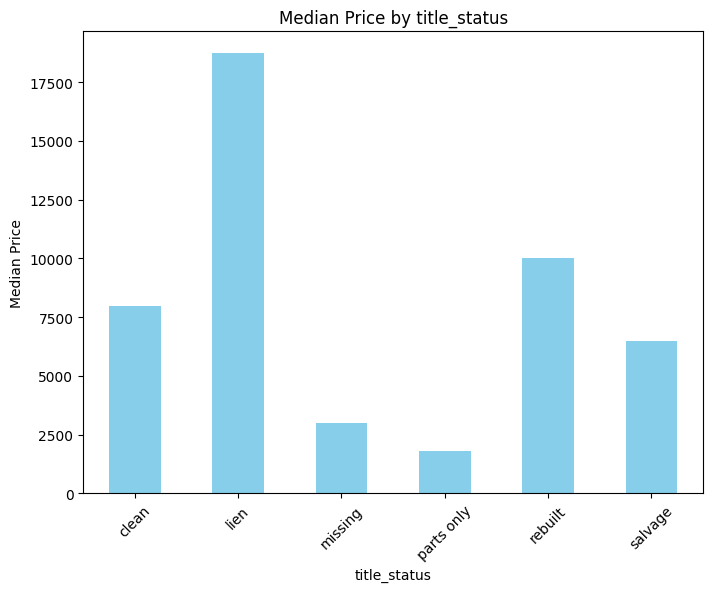

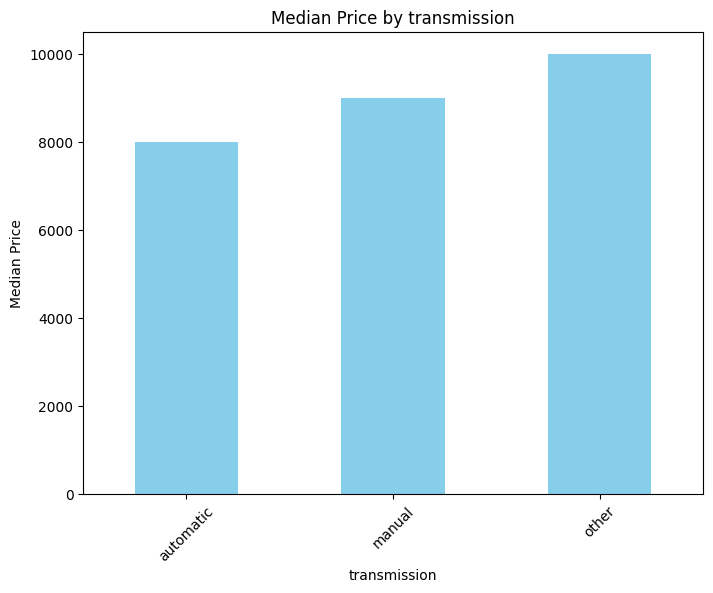

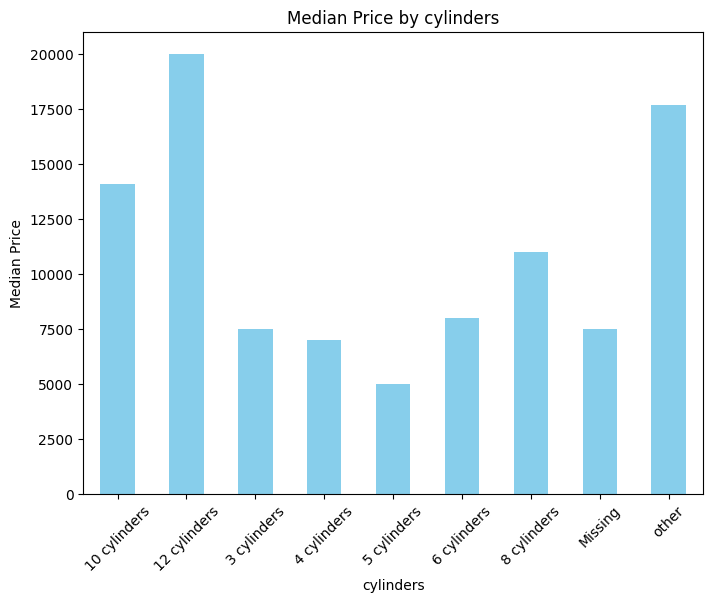

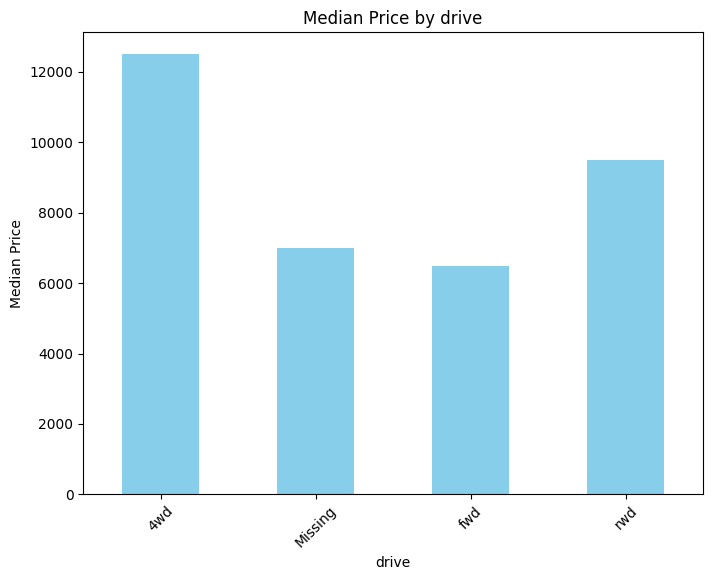

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    x_data.groupby(feature)['Price'].median().plot(kind='bar', color='skyblue')
    plt.title(f"Median Price by {feature}")
    plt.xlabel(feature)
    plt.ylabel('Median Price')
    plt.xticks(rotation=45)

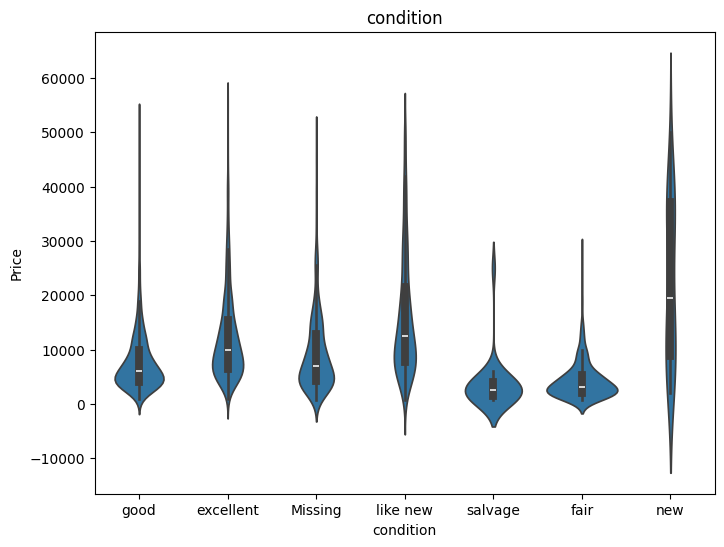

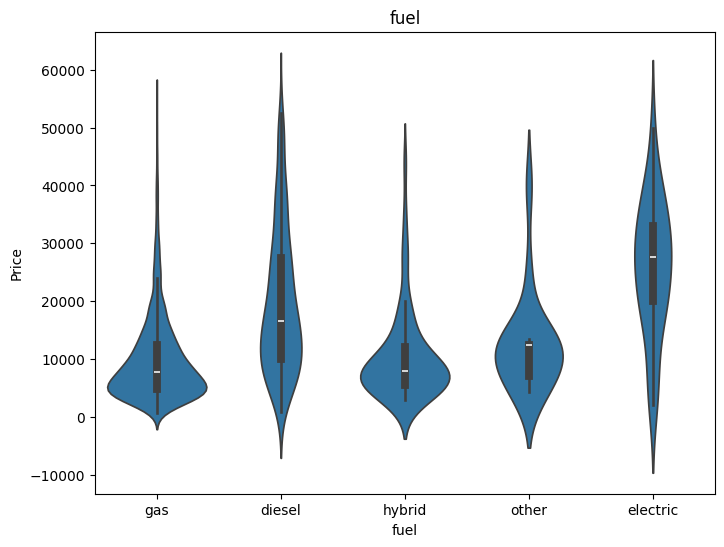

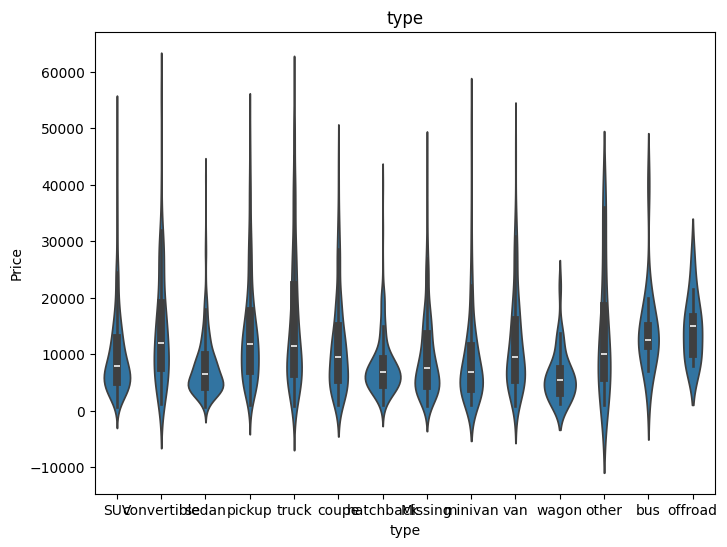

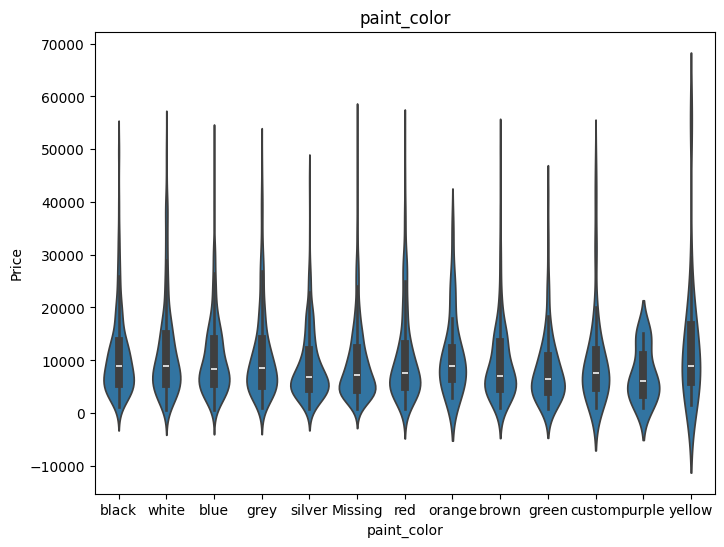

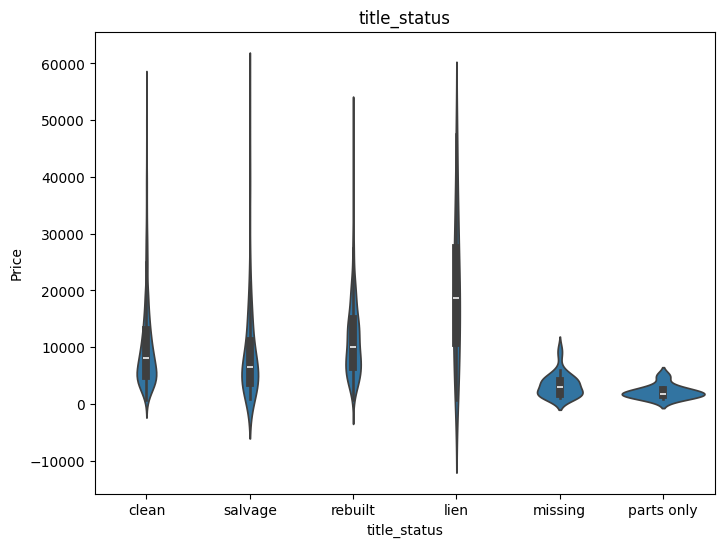

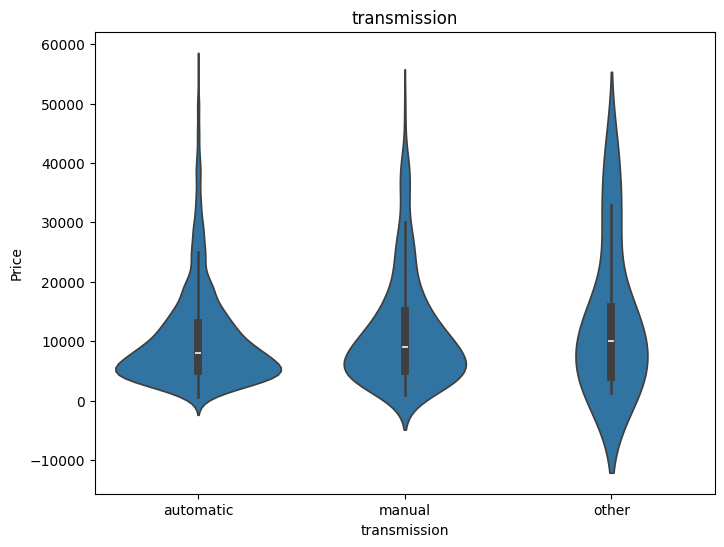

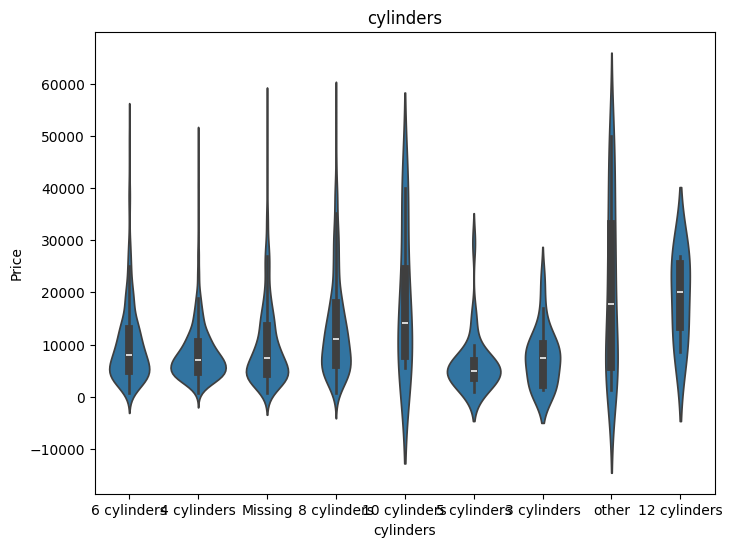

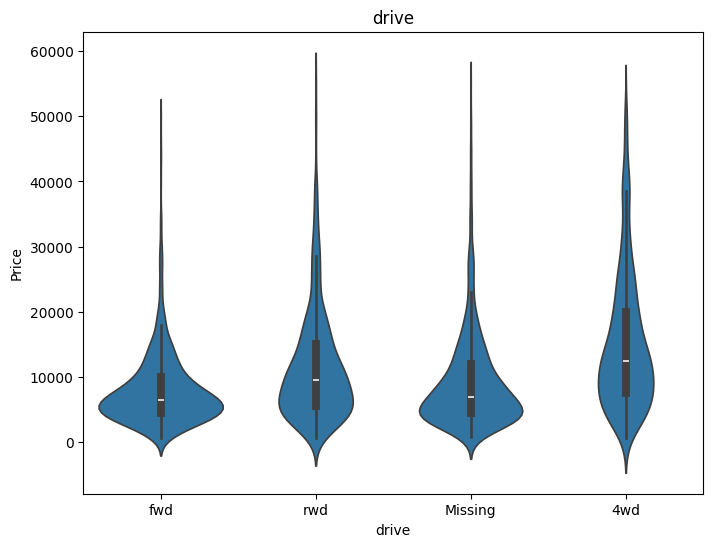

In [147]:
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x_data[feature], y=x_data['Price'], data=x_data)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Price')  # Corrected label

In [267]:
def extract_make(make_model):
    return make_model.split()[0]  # Only take the first word

copycopy = x_data.copy()
copycopy['make'] = x_data['Model'].apply(extract_make)
copycopy['make'] = copycopy['make'].str.lower()
print(copycopy['make'].value_counts().tail(20))

make
telsa         1
2014          1
tacoma        1
laramie       1
northwest     1
e350          1
monte         1
2004          1
chyrlser      1
m1097r1       1
74            1
c4            1
triumph       1
hyandui       1
x             1
mistubishi    1
2005ml        1
izuzu         1
elr           1
c4500         1
Name: count, dtype: int64


In [268]:
print((copycopy['make'].value_counts() == 1).sum())

89


In [295]:
make_counts = copycopy['make'].value_counts()
copycopy['make'] = copycopy['make'].map(lambda x: 'other' if make_counts[x] <= 3 else x)

In [299]:
print(len(copycopy['make'].value_counts()))
print(copycopy['make'].value_counts().tail(20))

51
make
tesla            23
porsche          23
vw               15
international    14
mini             12
mercury          11
hummer            8
scion             8
saturn            7
fiat              7
freightliner      7
corvette          5
suzuki            5
saab              5
isuzu             5
oldsmobile        4
smart             4
chev              4
bentley           4
mg                4
Name: count, dtype: int64


In [303]:
copycopy['make'].unique()

array(['toyota', 'jeep', 'honda', 'chrysler', 'lexus', 'chevrolet',
       'ford', 'nissan', 'subaru', 'bmw', 'other', 'volvo',
       'mercedes-benz', 'mercedes', 'porsche', 'dodge', 'infiniti', 'ram',
       'hyundai', 'lincoln', 'mazda', 'land rover', 'gmc', 'mercury',
       'kia', 'hummer', 'buick', 'fiat', 'audi', 'international', 'acura',
       'pontiac', 'cadillac', 'scion', 'smart', 'jaguar', 'volkswagen',
       'mitsubishi', 'oldsmobile', 'saturn', 'vw', 'corvette', 'tesla',
       'chev', 'bentley', 'mini', 'suzuki', 'saab', 'isuzu',
       'freightliner', 'mg'], dtype=object)

In [315]:
corrections = {
    'chevolet': 'chevrolet',
    'chev': 'chevrolet',
    'chevy': 'chevrolet',
    'caddilac': 'cadillac',
    'infinity': 'infiniti',
    'land': 'land rover',
    'range': 'land rover',
    'corvette':'other',
    'freightliner':'other',
    'vw':'volkswagen'
}

# Apply the corrections
copycopy['make'] = copycopy['make'].replace(corrections)

In [318]:
print(len(copycopy['make'].value_counts()))
print(copycopy['make'].value_counts().head(20))

47
make
ford          773
chevrolet     676
toyota        539
nissan        379
honda         333
dodge         270
jeep          190
bmw           172
lexus         164
other         146
gmc           142
mercedes      115
kia           114
hyundai       111
infiniti       87
cadillac       82
volkswagen     78
mazda          74
audi           73
subaru         65
Name: count, dtype: int64
